# Libraries Import

In [1]:
from sklearn.model_selection import KFold
from IPython.display import display
import random
import numpy as np
import pandas as pd

# Lectura de datos

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [3]:
!pwd

/home/judal/CURSOS_2023_II/pfc3/include


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/data.csv'

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
2        3  Small Groups Learning Synchronously Online at ...   
3        4  Using Weblogs for Knowledge Sharing and Learni...   
4        4  Using Weblogs for Knowledge Sharing and Learni...   
...    ...                                                ...   
1899  1476  Visualization of Syntax Trees for Language Pro...   
1900  1476  Visualization of Syntax Trees for Language Pro...   
1901  1477  Learning to Program with COALA, a Distributed ...   
1902  1477  Learning to Program with COALA, a Distributed ...   
1903  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords FirstLevel  
0     cooperative knowledge generation,knowledge  co...          H  
1     professional training,workplace learning,compu...          H  
2     professional training,workplace learning,compu...          J  
3     Experience-based Information System,wiki,weblo...          A  
4     Experience-based Information System,wiki,weblo...          D  
...                                                 ...        ...  
1899    syntax trees,visualization,educational software          D  
1900    syntax trees,visualization,educational software          K  
1901   learning programming,intelligent tutoring system          D  
1902   learning programming,intelligent tutoring system          I  
1903   learning programming,intelligent tutoring system          L  

[1904 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1904 non-null   int64 
 1   Title       1904 non-null   object
 2   Keywords    1863 non-null   object
 3   FirstLevel  1904 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


In [5]:
isHadNull = df.isnull().sum()

print(isHadNull)

ID             0
Title          0
Keywords      41
FirstLevel     0
dtype: int64


### Eliminando valores nulos

In [6]:
df_clean = df.dropna().reset_index(drop=True)

In [7]:
df_clean

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
2        3  Small Groups Learning Synchronously Online at ...   
3        4  Using Weblogs for Knowledge Sharing and Learni...   
4        4  Using Weblogs for Knowledge Sharing and Learni...   
...    ...                                                ...   
1858  1476  Visualization of Syntax Trees for Language Pro...   
1859  1476  Visualization of Syntax Trees for Language Pro...   
1860  1477  Learning to Program with COALA, a Distributed ...   
1861  1477  Learning to Program with COALA, a Distributed ...   
1862  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords FirstLevel  
0     cooperative knowledge generation,knowledge  co...          H  
1     professional training,workplace learning,compu...          H  
2     professional training,workplace learning,compu...          J  
3     Experience-based Information System,wiki,weblo...          A  
4     Experience-based Information System,wiki,weblo...          D  
...                                                 ...        ...  
1858    syntax trees,visualization,educational software          D  
1859    syntax trees,visualization,educational software          K  
1860   learning programming,intelligent tutoring system          D  
1861   learning programming,intelligent tutoring system          I  
1862   learning programming,intelligent tutoring system          L  

[1863 rows x 4 columns]

In [8]:
filtered_rows = df_clean[df_clean['Title'].str.contains('<|>')]
print(filtered_rows.iloc[3]['Title'])
print(len(filtered_rows))
df_clean = df_clean.drop(filtered_rows.index)

filtered_rows = df_clean[df_clean['Title'].str.contains('<|>')]
print(len(filtered_rows))


Data Driven Network Of Workstations (D<sup%gt;2</SUP>NOW)
26
0


In [9]:
df_clean

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
2        3  Small Groups Learning Synchronously Online at ...   
3        4  Using Weblogs for Knowledge Sharing and Learni...   
4        4  Using Weblogs for Knowledge Sharing and Learni...   
...    ...                                                ...   
1858  1476  Visualization of Syntax Trees for Language Pro...   
1859  1476  Visualization of Syntax Trees for Language Pro...   
1860  1477  Learning to Program with COALA, a Distributed ...   
1861  1477  Learning to Program with COALA, a Distributed ...   
1862  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords FirstLevel  
0     cooperative knowledge generation,knowledge  co...          H  
1     professional training,workplace learning,compu...          H  
2     professional training,workplace learning,compu...          J  
3     Experience-based Information System,wiki,weblo...          A  
4     Experience-based Information System,wiki,weblo...          D  
...                                                 ...        ...  
1858    syntax trees,visualization,educational software          D  
1859    syntax trees,visualization,educational software          K  
1860   learning programming,intelligent tutoring system          D  
1861   learning programming,intelligent tutoring system          I  
1862   learning programming,intelligent tutoring system          L  

[1837 rows x 4 columns]

### Preprocesamiento por Categorias

In [10]:
df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)
g = df_clean['FirstLevel'].value_counts()

i__ = 0
for key, value in g.items():
    mask = df_categories['Categories'] == key
    df_categories.loc[mask, 'Values'] = value
    i__+=1

df_categories

/tmp/ipykernel_1025/3114283533.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)


Categories  Values
0           A    35.0
1           B    48.0
2           C   121.0
3           D   311.0
4           E    52.0
5           F   296.0
6           G   106.0
7           H   377.0
8           I   226.0
9           J    86.0
10          K   148.0
11          L    15.0
12          M    16.0

In [11]:
dataByCategories = []
for cat in df_categories['Categories']:
    print(cat)
    dataByCategory = df_clean[df_clean['FirstLevel'] == cat]
    dataByCategories.append(dataByCategory)

A
B
C
D
E
F
G
H
I
J
K
L
M


In [12]:
print(len(dataByCategories))
print(len(dataByCategories[0]))

13
35


In [13]:
!pip install fuzzywuzzy

In [14]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
# from fuzzywuzzy import fuzz
from difflib import get_close_matches



from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/judal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/judal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/judal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/judal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/judal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
type(dataByCategories[12])

pandas.core.frame.DataFrame

In [16]:
listTokenByCategory = []
listTokenByCategory_t = []
listTokenByCategory_k = []
for dataByCat in dataByCategories:

    k_ = []
    t_ = []
    r_ = []

    i_ = 1
    for index, row in dataByCat.iterrows():

        ## Para el Titulo

        print("TITULO")
        _title = row['Title'].strip()

        cleaned_text = _title.lower()  #Convertir a minúsculas
        # print(cleaned_text)
        tokens = word_tokenize(cleaned_text)  #Tokenización
        print(i_)
        print(_title)
        print(tokens)
        i_+=1
        # Eliminación de stopwords
        stop_words = set(stopwords.words('english'))  # Lista de stopwords en español
        filtered_tokens = [token for token in tokens if token not in stop_words]
        print(filtered_tokens)

        # Eliminar signos de puntuación y la parte "-based" usando expresiones regulares
        cleaned_words = [re.sub(r'[^\w\s-]', '', word) for word in filtered_tokens]
        cleaned_words = [word.replace('-based', '') for word in cleaned_words if word and word != '-']
        cleaned_words = [word.replace('using', '') for word in cleaned_words if word and word != 'using']
        cleaned_words = [word for word in cleaned_words if len(word) > 1]
        cleaned_words = list(set(cleaned_words))


        print("cleaned word", cleaned_words)

        # # Stemming y lematización
        stemmer_t = PorterStemmer()
        lemmatizer_t = WordNetLemmatizer()
        stemmed_tokens_t = [stemmer_t.stem(token) for token in cleaned_words]
        print("stemmed word", stemmed_tokens_t)
        lemmatized_tokens_t = [lemmatizer_t.lemmatize(token) for token in cleaned_words]
        print("lemmatized word",lemmatized_tokens_t)

        t_.append(lemmatized_tokens_t)

        ## Para el Keywords

        print("KEYWORDS")
        _keywords = row['Keywords']
        print(_keywords)
        cleaned_text = _keywords.lower()
        # filtered_tokens = cleaned_text.split(',')
        cleaned_text = cleaned_text.replace(",", " ")

        # Tokenización
        tokens = word_tokenize(cleaned_text)

        # Eliminación de stopwords
        stop_words = set(stopwords.words('english'))  # Lista de stopwords en español
        filtered_tokens = [token for token in tokens if token not in stop_words]
        print(filtered_tokens)

        # print(cleaned_text)
        cleaned_words = [re.sub(r'[^\w\s-]', '', word) for word in filtered_tokens]
        cleaned_words = [word.replace('-based', '') for word in cleaned_words if word and word != '-']
        cleaned_words = [word.replace('using', '') for word in cleaned_words if word and word != 'using']
        cleaned_words = [word for word in cleaned_words if len(word) > 1 ]
        cleaned_words = list(set(cleaned_words))

        print("cleaned word keyword", cleaned_words)

        ## Stemming y lematización
        stemmer_k = PorterStemmer()
        lemmatizer_k = WordNetLemmatizer()
        stemmed_tokens_k = [stemmer_k.stem(token) for token in cleaned_words]
        print("stemmed word keyword", stemmed_tokens_k)
        lemmatized_tokens_k = [lemmatizer_k.lemmatize(token) for token in cleaned_words]
        print("lemmatized word keyword",lemmatized_tokens_k)

        k_.append(lemmatized_tokens_k)
        # dataPre = lemmatized_tokens_t + lemmatized_tokens_k

        ## TITLE + KEYWORDS
        arrUnion = list(set(lemmatized_tokens_t + lemmatized_tokens_k))
        print("raw data: ",arrUnion)

        dataPre = []
        for word in arrUnion:
            if not any(get_close_matches(word, dataPre, n=1, cutoff=0.8)):
                dataPre.append(word)

        # dataPre = []
        # for word in arrUnion:
        #     is_duplicate = any(fuzz.partial_ratio(word, existing_word) > 95  for existing_word in dataPre)
        #     if not is_duplicate:
        #         dataPre.append(word)
        print("prepro data", dataPre)

        r_.append(dataPre)
    listTokenByCategory.append(r_)

    listTokenByCategory_k.append(k_)

    listTokenByCategory_t.append(t_)
        # print(row['Title']," - ",row['Keywords'])

TITULO
1
Using Weblogs for Knowledge Sharing and Learning in Information Spaces
['using', 'weblogs', 'for', 'knowledge', 'sharing', 'and', 'learning', 'in', 'information', 'spaces']
['using', 'weblogs', 'knowledge', 'sharing', 'learning', 'information', 'spaces']
cleaned word ['learning', 'weblogs', 'knowledge', 'sharing', 'information', 'spaces']
stemmed word ['learn', 'weblog', 'knowledg', 'share', 'inform', 'space']
lemmatized word ['learning', 'weblogs', 'knowledge', 'sharing', 'information', 'space']
KEYWORDS
Experience-based Information System,wiki,weblog,pedagogical information agent,information space,micro-didactical learning arrangement
['experience-based', 'information', 'system', 'wiki', 'weblog', 'pedagogical', 'information', 'agent', 'information', 'space', 'micro-didactical', 'learning', 'arrangement']
cleaned word keyword ['arrangement', 'learning', 'experience', 'micro-didactical', 'pedagogical', 'weblog', 'space', 'system', 'wiki', 'information', 'agent']
stemmed word 

In [17]:
listTokenByCategory[0][27]

['work',
 'engineering',
 'embedded',
 'business',
 'knowledge',
 'operation',
 'education',
 'productivity',
 'case',
 'model',
 'os',
 'software',
 'management',
 'improvement',
 'collaborative',
 'portfolio',
 'methodology',
 'consciousness',
 'hierarchy',
 'reverse',
 'use',
 'assessment',
 'life',
 'support',
 'cycle',
 'theory',
 'accreditation',
 'system',
 'tool',
 'continuous']

In [18]:
def count_terms_frecuency(r):

  freq_dist = FreqDist(r)
  term_frequency = dict(freq_dist)
  term_frequency = dict(sorted(term_frequency.items(), key=lambda item: item[1], reverse=True))


  return term_frequency

In [19]:
tfByCategories = []
tfByCategories_t = []
tfByCategories_k = []
for i in range(len(listTokenByCategory)):
    tokenByDoc = []
    for j in range(len(listTokenByCategory[i])):
        tokenByDoc += listTokenByCategory[i][j]
    tf = count_terms_frecuency(tokenByDoc)
    tfByCategories.append(tf)

for i in range(len(listTokenByCategory_k)):
    tokenByDoc = []
    for j in range(len(listTokenByCategory_k[i])):
        tokenByDoc += listTokenByCategory_k[i][j]
    tf = count_terms_frecuency(tokenByDoc)
    tfByCategories_k.append(tf)

for i in range(len(listTokenByCategory_t)):
    tokenByDoc = []
    for j in range(len(listTokenByCategory_t[i])):
        tokenByDoc += listTokenByCategory_t[i][j]
    tf = count_terms_frecuency(tokenByDoc)
    tfByCategories_t.append(tf)




In [20]:
len(tfByCategories)

13

In [21]:
print("by Category: ", tfByCategories[4])

by Category:  {'data': 11, 'algorithm': 10, 'cryptography': 10, 'security': 7, 'key': 6, 'system': 6, 'function': 6, 'scheme': 5, 'network': 4, 'theory': 4, 'management': 4, 'knowledge': 4, 'hash': 4, 'boolean': 4, 'model': 4, 'attack': 4, 'encryption': 4, 'information': 3, 'consensus': 3, 'conflict': 3, 'method': 3, 'efficient': 3, 'based': 3, 'fast': 3, 'implementation': 3, 'analysis': 3, 'public': 3, 'dynamic': 3, 'compression': 3, 'structure': 3, 's-boxes': 3, 'hierarchical': 3, 'randomness': 3, 'code': 3, 'mining': 2, 'rule': 2, 'computer': 2, 'transfer': 2, 'protection': 2, 'secrecy': 2, 'privacy': 2, 'secure': 2, 'finite': 2, 'binary': 2, 'domain': 2, 'complexity': 2, 'entropy': 2, 'closure': 2, 'process': 2, 'telemetry': 2, 'predictor': 2, 'neural': 2, 'search': 2, 'retrieval': 2, 'spatial': 2, 'representation': 2, 'ontology': 2, 'shannon': 2, 'partition': 2, 'attribute': 2, 'genetic': 2, 'cryptanalysis': 2, 'set': 2, 'solution': 2, 'instantiated': 2, 'database': 2, 'sharing': 

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

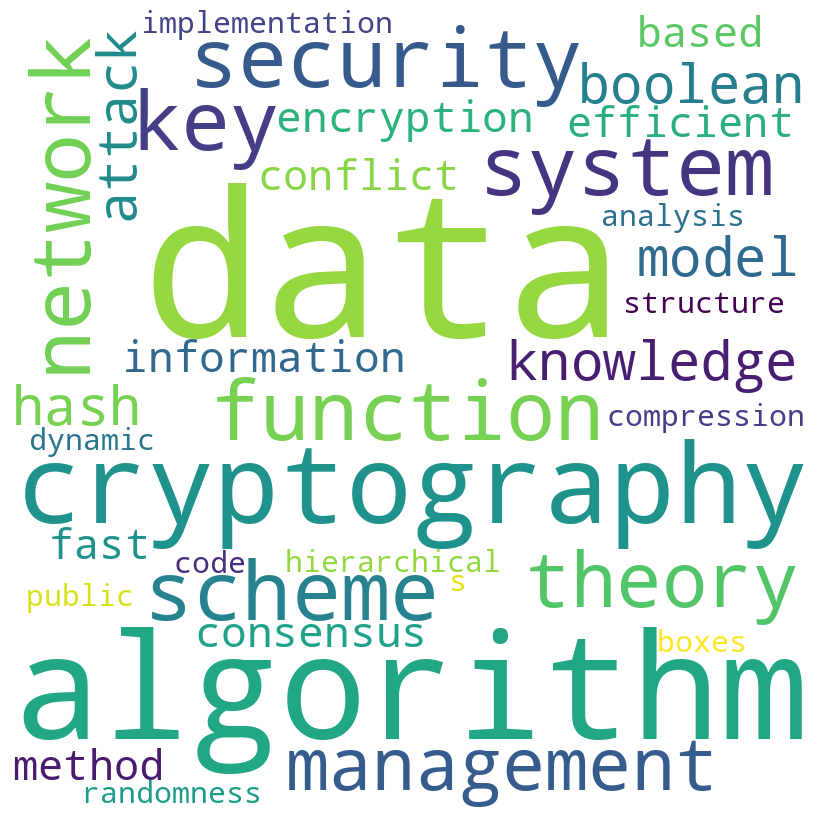

In [24]:
max_frequency = max(tfByCategories[4].values())
scaling_factor = 2
scaled_frequencies = {word: scaling_factor * (frequency / max_frequency) for word, frequency in tfByCategories[4].items()}

text = ' '.join([word for word in scaled_frequencies for _ in range(round(scaled_frequencies[word]))])
# print(text)
nube_palabras = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(nube_palabras)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

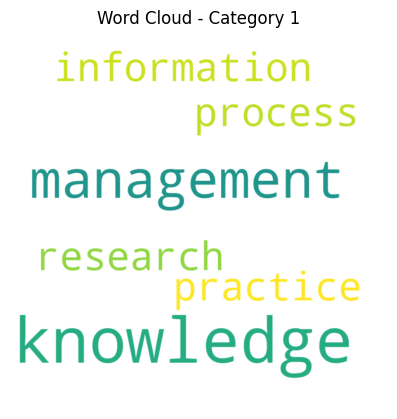

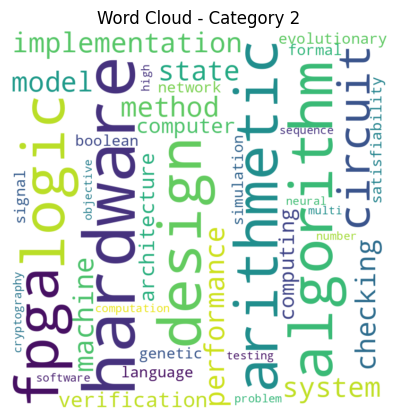

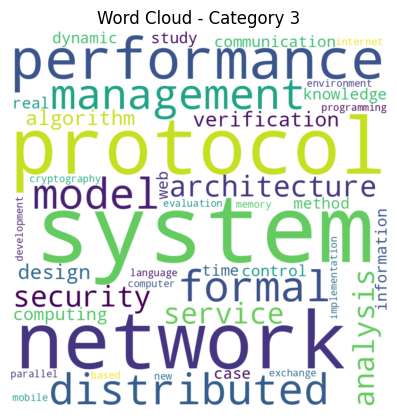

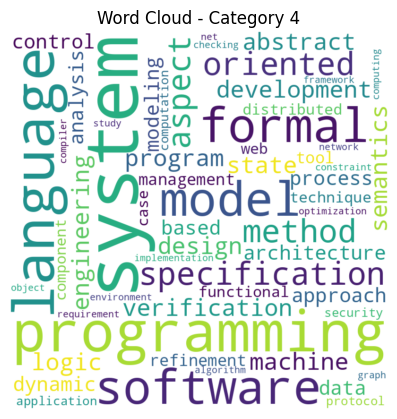

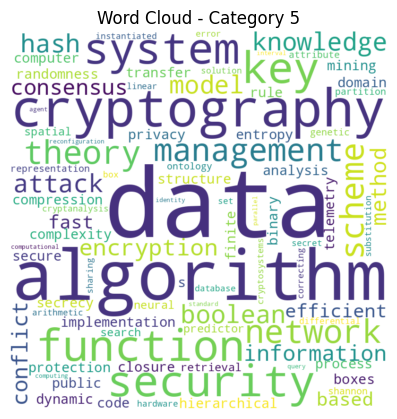

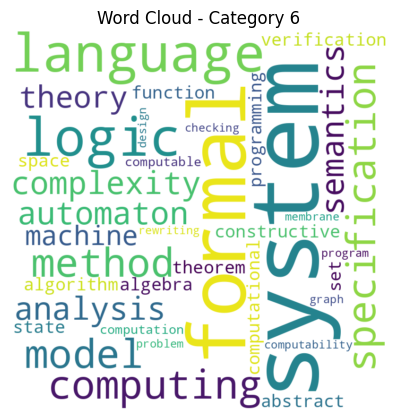

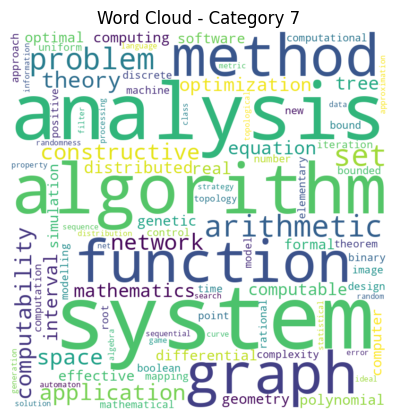

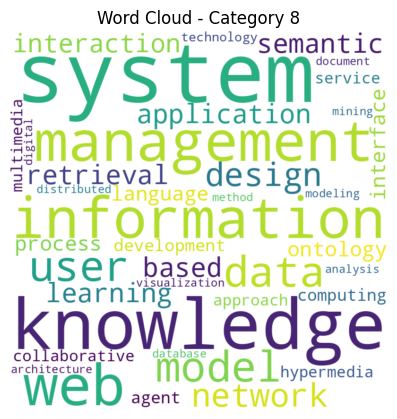

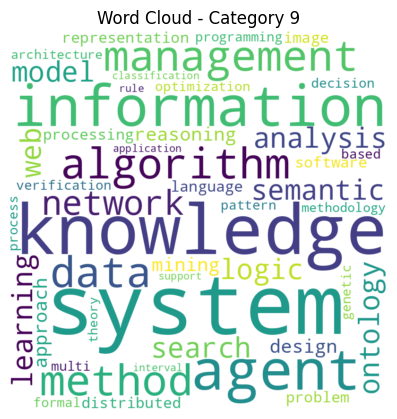

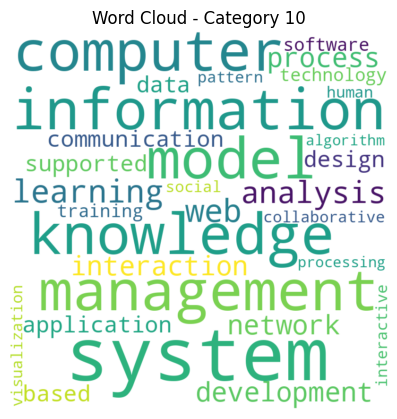

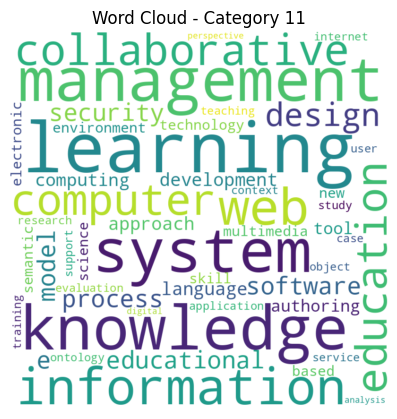

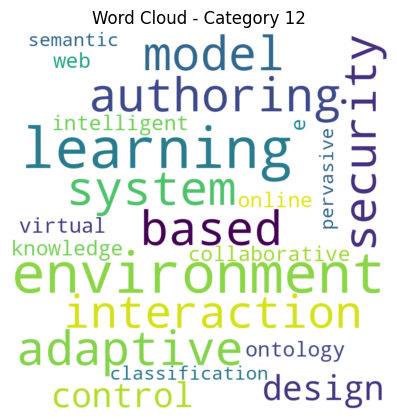

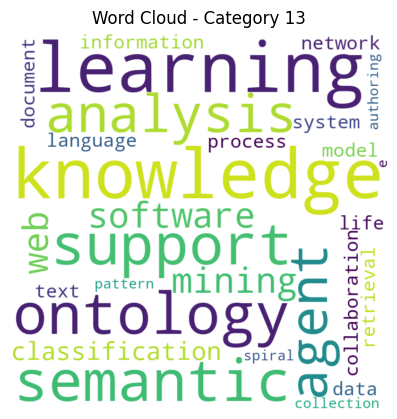

In [25]:
scaling_factor = 3

for i, category_dict in enumerate(tfByCategories):
    max_frequency = max(category_dict.values())
    scaled_frequencies = {word: scaling_factor * (frequency / max_frequency) for word, frequency in category_dict.items()}
    text = ' '.join([word for word, freq in scaled_frequencies.items() for _ in range(round(freq))])

    nube_palabras = WordCloud(width=800, height=800, background_color='white').generate(text)

    plt.figure(figsize=(4, 4), facecolor=None)
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.title(f'Word Cloud - Category {i+1}')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

### Agrupando las Categorias por Articulo

In [26]:
df_clean.iloc[900]['Title']

'MTAC - A Multithreaded VLIW Architecture for PRAM Simulation'

In [27]:
grouped_df = df_clean.groupby(['ID', 'Title', 'Keywords'])['FirstLevel'].unique().reset_index()
grouped_df = grouped_df.sort_values('ID')
grouped_df

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
2        4  Using Weblogs for Knowledge Sharing and Learni...   
3        5  Modelling and Implementing Pre-built Informati...   
4        6  Tube Map Visualization: Evaluation of a Novel ...   
...    ...                                                ...   
1097  1473  Eduquito: Virtual Environment for Digital Incl...   
1098  1474  Development of a Web Application for Managemen...   
1099  1475  Semantic Spiral Timelines Used as Support for ...   
1100  1476  Visualization of Syntax Trees for Language Pro...   
1101  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords       FirstLevel  
0     cooperative knowledge generation,knowledge  co...              [H]  
1     professional training,workplace learning,compu...           [H, J]  
2     Experience-based Information System,wiki,weblo...  [A, D, H, J, K]  
3     modelling method,introduction method,context-a...        [H, I, J]  
4     knowledge visualization,information  visualiza...              [H]  
...                                                 ...              ...  
1097  virtual environment,accessibility,persons with...              [K]  
1098              learning styles,Web-based application              [K]  
1099    visualization,e-learning,timeline,spiral,Moodle           [L, M]  
1100    syntax trees,visualization,educational software           [D, K]  
1101   learning programming,intelligent tutoring system        [D, I, L]  

[1102 rows x 4 columns]

### Verificando la cantidad de datos por categoria

In [28]:
df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)
g = df_clean['FirstLevel'].value_counts()

i__ = 0
for key, value in g.items():
    mask = df_categories['Categories'] == key
    df_categories.loc[mask, 'Values'] = value
    i__+=1

df_categories

/tmp/ipykernel_1025/3114283533.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)


Categories  Values
0           A    35.0
1           B    48.0
2           C   121.0
3           D   311.0
4           E    52.0
5           F   296.0
6           G   106.0
7           H   377.0
8           I   226.0
9           J    86.0
10          K   148.0
11          L    15.0
12          M    16.0

/tmp/ipykernel_1018/3128913147.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)


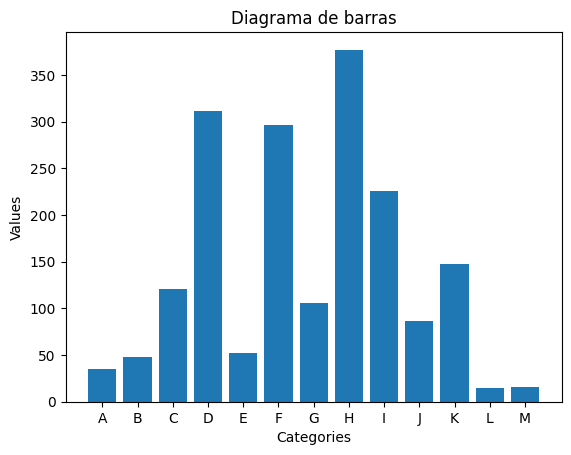

In [32]:
df_categories = pd.DataFrame({'Categories': df['FirstLevel'].drop_duplicates(), 'Values': {}}).sort_values('Categories').reset_index(drop=True)
g = df_clean['FirstLevel'].value_counts()

i__ = 0
for key, value in g.items():
    mask = df_categories['Categories'] == key
    df_categories.loc[mask, 'Values'] = value
    i__+=1
plt.bar(df_categories['Categories'], df_categories['Values'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Diagrama de barras')
plt.show()


# Preprocesamiento de Datos 🔍

## Import librerias nltk (Natural Language Toolkit)

In [ ]:
# import nltk
# import re
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.probability import FreqDist
# from nltk.tokenize import word_tokenize

# from nltk.stem import WordNetLemmatizer

### Estableciendo separador para cada token

In [36]:
def textProcessingToString(row):
  strText = ""
  for i in range(len(row)):
    # print(text)
    if (i == len(row) -1):
      strText = strText + row[i]
    else:
      strText = strText + row[i] + "##"
  return strText

### Stemming and Stop Word

In [37]:
def textProcessingWithStopwordsAndStemming(df_data):

    titlePre = []
    keywordsPre = []
    tkPre = []

    for index, row in df_data.iterrows():

        ## TO TITLE

        _title = row['Title'].strip()

        cleaned_text = _title.lower()  # Convertir a minúsculas
        # print(cleaned_text)
        tokens = word_tokenize(cleaned_text)  # Tokenización

        # Eliminación de stopwords
        stop_words = set(stopwords.words('english'))  # Lista de stopwords en español
        filtered_tokens = [token for token in tokens if token not in stop_words]
        # print(filtered_tokens)

        # Eliminar signos de puntuación y la parte "-based" usando expresiones regulares
        cleaned_words = [re.sub(r'[^\w\s-]', '', word) for word in filtered_tokens]
        cleaned_words = [word.replace('-based', '') for word in cleaned_words if word and word != '-']
        cleaned_words = [word.replace('using', '') for word in cleaned_words if word and word != 'using']
        cleaned_words = [word for word in cleaned_words if len(word) > 1]
        cleaned_words = list(set(cleaned_words))
        # print("cleaned word", cleaned_words)

        # # Stemming y lematización
        lemmatizer_t = WordNetLemmatizer()
        lemmatized_tokens_t = [lemmatizer_t.lemmatize(token) for token in cleaned_words]
        # print("lemmatized word",lemmatized_tokens_t)
        titlePre.append(lemmatized_tokens_t)

        ## TO KEYWORDS

        _keywords = row['Keywords']
        cleaned_text = _keywords.lower()
        cleaned_text = cleaned_text.replace(",", " ")

        # Tokenización
        tokens = word_tokenize(cleaned_text)

        # Eliminación de stopwords
        stop_words = set(stopwords.words('english'))  # Lista de stopwords en español
        filtered_tokens = [token for token in tokens if token not in stop_words]
        # print(filtered_tokens)

        cleaned_words = [re.sub(r'[^\w\s-]', '', word) for word in filtered_tokens]
        cleaned_words = [word.replace('-based', '') for word in cleaned_words if word and word != '-']
        cleaned_words = [word.replace('using', '') for word in cleaned_words if word and word != 'using']
        cleaned_words = [word for word in cleaned_words if len(word) > 1 ]
        cleaned_words = list(set(cleaned_words))

        # print("cleaned word keyword", cleaned_words)

        ## Stemming y lematización
        lemmatizer_k = WordNetLemmatizer()
        lemmatized_tokens_k = [lemmatizer_k.lemmatize(token) for token in cleaned_words]
        # print("lemmatized word keyword",lemmatized_tokens_k)

        keywordsPre.append(lemmatized_tokens_k)
        # dataPre = lemmatized_tokens_t + lemmatized_tokens_k

        ## TITLE + KEYWORDS
        arrUnion = list(set(lemmatized_tokens_t + lemmatized_tokens_k))
        # print("raw data: ",arrUnion)

        dataPre = []
        for word in arrUnion:
            if not any(get_close_matches(word, dataPre, n=1, cutoff=0.8)):
                dataPre.append(word)

        # print("prepro data", dataPre)

        tkPre.append(dataPre)

    return titlePre, keywordsPre, tkPre

In [38]:
%%time
titlePre,keywordsPre, ktPre = textProcessingWithStopwordsAndStemming(grouped_df)

CPU times: user 3.1 s, sys: 393 ms, total: 3.49 s
Wall time: 3.52 s


In [39]:
print(len(titlePre))
print(len(keywordsPre))
print(len(ktPre))

1102
1102
1102


### Procesando la Data

In [45]:
def setTitleKeywordClean(grouped_df):

  titlePre,keywordsPre,ktPre = textProcessingWithStopwordsAndStemming(grouped_df)

  #by Title
  newData = []
  for row in titlePre:
    titleKey = textProcessingToString(row)
    # Eliminar los puntos utilizando regex
    titleText_cleaned = re.sub(r'\.', '', titleKey)
    newData.append(titleText_cleaned)
  grouped_df['Title_clean'] = newData


  #by Keywords
  newData = []
  for row in keywordsPre:
    keywordsKey = textProcessingToString(row)
    # Eliminar los puntos utilizando regex
    keywordsText_cleaned = re.sub(r'\.', '', keywordsKey)
    newData.append(keywordsText_cleaned)

  grouped_df['Keywords_clean'] = newData


  newData = []
  for row in ktPre:
    ktKey = textProcessingToString(row)
    # Eliminar los puntos utilizando regex
    ktText_cleaned = re.sub(r'\.', '', ktKey)
    newData.append(ktText_cleaned)

  grouped_df['kt_clean'] = newData



### Establecer kt_clean

In [46]:
setTitleKeywordClean(grouped_df)

In [47]:
grouped_df

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
2        4  Using Weblogs for Knowledge Sharing and Learni...   
3        5  Modelling and Implementing Pre-built Informati...   
4        6  Tube Map Visualization: Evaluation of a Novel ...   
...    ...                                                ...   
1097  1473  Eduquito: Virtual Environment for Digital Incl...   
1098  1474  Development of a Web Application for Managemen...   
1099  1475  Semantic Spiral Timelines Used as Support for ...   
1100  1476  Visualization of Syntax Trees for Language Pro...   
1101  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords       FirstLevel  \
0     cooperative knowledge generation,knowledge  co...              [H]   
1     professional training,workplace learning,compu...           [H, J]   
2     Experience-based Information System,wiki,weblo...  [A, D, H, J, K]   
3     modelling method,introduction method,context-a...        [H, I, J]   
4     knowledge visualization,information  visualiza...              [H]   
...                                                 ...              ...   
1097  virtual environment,accessibility,persons with...              [K]   
1098              learning styles,Web-based application              [K]   
1099    visualization,e-learning,timeline,spiral,Moodle           [L, M]   
1100    syntax trees,visualization,educational software           [D, K]   
1101   learning programming,intelligent tutoring system        [D, I, L]   

                                            Title_clean  \
0     integration##process-oriented##community##stru...   
1     workplace##synchronously##group##acceptance##o...   
2     space##learning##knowledge##sharing##weblogs##...   
3     architecture##space##process##knowledge##manag...   
4     evaluation##application##map##visualization##t...   
...                                                 ...   
1097  special##environment##educational##inclusion##...   
1098  application##style##development##web##learning...   
1099  timeline##support##spiral##semantic##used##e-l...   
1100  tree##language##processing##visualization##syn...   
1101  assisted##environment##distributed##coala##lea...   

                                         Keywords_clean  \
0     community##wiki##cooperative##structure##knowl...   
1     assurance##workplace##training##cooperative##s...   
2     weblog##wiki##pedagogical##space##micro-didact...   
3     business##collaborative##filtering##process##i...   
4     project##visualization##storytelling##visual##...   
...                                                 ...   
1097  environment##person##disability##virtual##acce...   
1098                  style##learning##application##web   
1099  timeline##spiral##moodle##visualization##e-lea...   
1100  tree##educational##visualization##syntax##soft...   
1101  tutoring##intelligent##system##learning##progr...   

                                               kt_clean  
0     community##wiki##structure##cooperative##proce...  
1     training##cooperative##quality##learning##empi...  
2     weblog##pedagogical##experience##space##micro-...  
3     information##business##architecture##collabora...  
4     information##application##project##map##visual...  
...                                                 ...  
1097  special##need##person##environment##educationa...  
1098  application##development##web##style##learning...  
1099  support##spiral##timeline##semantic##moodle##v...  
1100  language##educational##processing##visualizati...  
1101  tutoring##assisted##environment##distributed##...  

[1102 rows x 7 columns]

In [48]:
print(grouped_df.iloc[1101]['Title'])
print(grouped_df.iloc[1101]['Keywords'])
print(grouped_df.iloc[1101]['Title_clean'])
print(grouped_df.iloc[1101]['Keywords_clean'])
print(grouped_df.iloc[1101]['kt_clean'])

Learning to Program with COALA, a Distributed Computer Assisted Environment
learning programming,intelligent tutoring system
assisted##environment##distributed##coala##learning##program##computer
tutoring##intelligent##system##learning##programming
tutoring##assisted##environment##distributed##coala##intelligent##system##learning##program##computer##programming


# Obtener el mejor thresold

In [49]:
def getThresold(population,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train,exp_list,threshold):
  # aca la funcion fittness sera trabajoso basicamente es el algoritmo fuzzy classifier algorithm mas la parte de evaluacion multietiqueta

  fitnessByChromosome =[]
  thresholdByChromosome =[]

  cnt_p = 1

  for chromosome in population:

    bestThresold = 0
    bestAcurracy = 0
    print("\n ------------------------------------ POBLACION: ", cnt_p," ------------------------------------ \n")
    thres = threshold
    cont = 0
    while(thres < 1.0):

      pred_list_kt = []
      pred_list_k = []
      pred_list_t = []
      print("Con threshold: ", thres);

      cnt_d = 1
      for tf in dataFBRM_train:
        # print("\nDOCUMENTO TF",cnt_d,"\n")
        pred_keywords_title, pred_keywords, pred_title = FuzzyClassifierAlgorithm(chromosome,df_featuresMap,nColumns,tf,thres)
        pred_list_kt.append(pred_keywords_title)
        pred_list_k.append(pred_keywords)
        pred_list_t.append(pred_title)
        cnt_d += 1


      labels = sorted(set([label for sublist in exp_list for label in sublist]))

      y_true_bin = np.zeros((len(exp_list), len(labels)))
      y_pred_bin = np.zeros((len(pred_list_kt), len(labels)))

      for i, label_list in enumerate(exp_list):
          for label in label_list:
              y_true_bin[i, labels.index(label)] = 1

      for i, label_list in enumerate(pred_list_kt):
          for label in label_list:
              y_pred_bin[i, labels.index(label)] = 1

      # Calcular la precisión (accuracy) para cada etiqueta y promediar
#       macro_accuracy = 0
#       for i in range(len(labels)):
#           true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
#           true_negatives = np.sum(np.logical_and(1 - y_true_bin[:, i], 1 - y_pred_bin[:, i]))
#           total_samples = true_positives + true_negatives + np.sum(np.logical_xor(y_true_bin[:, i], y_pred_bin[:, i]))
#           label_accuracy = (true_positives + true_negatives) / total_samples
#           macro_accuracy += label_accuracy

#       macro_accuracy /= len(labels)
      macro_f1 = 0
      for i in range(len(labels)):
          true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
          false_positives = np.sum(np.logical_and(1 - y_true_bin[:, i], y_pred_bin[:, i]))
          false_negatives = np.sum(np.logical_and(y_true_bin[:, i], 1 - y_pred_bin[:, i]))

          precision = true_positives / (true_positives + false_positives + 1e-9)
          recall = true_positives / (true_positives + false_negatives + 1e-9)

          f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)
          macro_f1 += f1_score

      macro_f1 /= len(labels)

      if(macro_f1 > bestAcurracy):

        bestThresold = thres
        bestAcurracy = macro_f1
        print("the best Thresold: ", bestThresold)
        print("the best Acurracy: ", bestAcurracy)
        cont = 0
      else:
        cont +=1

      if (cont > 5):
            break;

      thres+=0.01

    cnt_p +=1
    fitnessByChromosome.append(bestAcurracy)
    thresholdByChromosome.append(bestThresold)

  return fitnessByChromosome, thresholdByChromosome

#  Fuzzy Based Rules Merger (FBRM) algorithm

### Obtener la Frecuencia de Terminos por Articulo (TF)

In [50]:
def count_terms_frecuency(r):

  freq_dist = FreqDist(r)
  term_frequency = dict(freq_dist)

  return term_frequency

In [51]:
def algorithmFBRM(category,data_):
  k = [] #array of keywords of category c
  t = [] #array of title of category c
  r = [] # resultant array of k and t of category c

  for i in range(len(data_)):
    titles = data_.iloc[i]['Title_clean']
    keywords = data_.iloc[i]['Keywords_clean']

    titles = re.split(r'##', titles)
    keywords = re.split(r'##', keywords)

    for text in titles:
      k.append(text)
    for text in keywords:
      t.append(text)
  r = k + t
  return k, t, r

# ALGORITMO GENETICO

### Cantidad de parametros
> Cantidad de individuos: 10

> Cantidad de genes por individuos: ---

> Seleccion por torneo

> Probabilidad de Cruzamiento: 0.9

> Cruzamiento de BLX-alpha :0.5

> Probabilidad de mutacion: 0.5

> Mutacion de Intercambio

> Cantidad de iteraciones: 2000

## Generacion de Poblacion

In [52]:
def genPopulation(nInd,data_tf):
  datadf_chromosome = data_tf[data_tf['Metadata'] != 'tf_keywords_title']
  # print(datadf_chromosome)
  df_features = datadf_chromosome.iloc[:, 2:]
  # print(df_features.shape)
  population = []
  flattened_list = df_features.values.ravel().tolist()
  # print(flattened_list)

  for i in range(nInd):
    # population.append([int(round(random.uniform(gen - (gen * 0.1), gen + (gen * 0.1)))) for gen in flattened_list])
    # population.append([random.uniform(gen - (gen * 0.1), gen + (gen * 0.1)) for gen in flattened_list])
    # -1 y 1
    population.append([gen + ((random.random() * 2 - 1) * gen * 0.1) for gen in flattened_list])

  return np.array(population), df_features.shape[1]

In [ ]:
# nGenes = population.shape[1]
# nGenes

## Funcion Fitness

In [53]:
def FuzzyClassifierAlgorithm(chromosome, df_featuresMap, nColumns, tf, threshold):
    pred_keywords_title = []
    pred_keywords = []
    pred_title = []

    columns = list(df_featuresMap.iloc[:, 2:].columns)
    nRow = len(chromosome) // nColumns

    tf_keywords_title = df_featuresMap[df_featuresMap['Metadata'] == 'tf_keywords_title']

    w_keywords = np.zeros(len(tf_keywords_title))
    w_title = np.zeros(len(tf_keywords_title))
    w_keywords_title = np.zeros(len(tf_keywords_title))

    c_list = tf_keywords_title['Names'].tolist()

    tf_i = 0
    tf_j = 0

    for i in range(nRow):
        if (i % 2 == 0):
          # to keyword
            idx_arr = [[columns.index(key), value] for key,value in tf.items() if key in columns]
            wk_k = sum([chromosome[i*nColumns + idx[0]] * idx[1] for idx in idx_arr])
            w_keywords[tf_i] = wk_k
            tf_i += 1
        else:
          # to title
            idx = [columns.index(key) for key,value in tf.items() if key in columns]
            wk_t = sum([chromosome[i*nColumns + idx[0]] * idx[1] for idx in idx_arr])
            w_title[tf_j] = wk_t
            tf_j += 1

    tf_tk = 0
    # to keyword + title
    for i in range(nRow):
        if (i % 2 == 0):
            idx = [columns.index(key) for key,value in tf.items() if key in columns]
            wk_kt = sum([(chromosome[i*nColumns + idx[0]] + chromosome[(i+1)*nColumns + idx[0]]) * idx[1] for idx in idx_arr])
            w_keywords_title[tf_tk] = wk_kt
            tf_tk += 1


    # print("KEYWORDS")
    # print(w_keywords)
    # print("TITLE")
    # print(w_title)
    # print("KEYWORD + TITLE")
    # print(w_keywords_title)

    weightSum = w_keywords.sum()
    uD = w_keywords / weightSum
    pred_keywords = [c_list[i] for i in range(len(uD)) if uD[i] >= threshold]

    weightSum = w_title.sum()
    uD = w_title / weightSum
    pred_title = [c_list[i] for i in range(len(uD)) if uD[i] >= threshold]

    weightSum = w_keywords_title.sum()
    uD = w_keywords_title / weightSum
    pred_keywords_title = [c_list[i] for i in range(len(uD)) if uD[i] >= threshold]

    return pred_keywords_title, pred_keywords, pred_title


In [ ]:
def getFittness(population,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train,exp_list,threshold):
  # aca la funcion fittness sera trabajoso basicamente es el algoritmo fuzzy classifier algorithm mas la parte de evaluacion multietiqueta


  fitnessByChromosome = []
  predictionList = []

  cnt_p = 1


  for chromosome in population:

    print("\n ------------------------------------ POBLACION: ", cnt_p," ------------------------------------ \n")

    pred_list_kt = []
    pred_list_k = []
    pred_list_t = []

    cnt_d = 1
    for tf in dataFBRM_train:
      # print("\nDOCUMENTO TF",cnt_d,"\n")
      pred_keywords_title, pred_keywords, pred_title = FuzzyClassifierAlgorithm(chromosome,df_featuresMap,nColumns,tf,threshold)
      pred_list_kt.append(pred_keywords_title)
      pred_list_k.append(pred_keywords)
      pred_list_t.append(pred_title)
      cnt_d += 1

    labels = sorted(set([label for sublist in exp_list for label in sublist]))

    y_true_bin = np.zeros((len(exp_list), len(labels)))
    y_pred_bin = np.zeros((len(pred_list_kt), len(labels)))

    for i, label_list in enumerate(exp_list):
        for label in label_list:
            y_true_bin[i, labels.index(label)] = 1

    for i, label_list in enumerate(pred_list_kt):
        for label in label_list:
            y_pred_bin[i, labels.index(label)] = 1

    # Calcular la precisión (accuracy) para cada etiqueta y promediar
#     macro_accuracy = 0
#     for i in range(len(labels)):
#      true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
#      true_negatives = np.sum(np.logical_and(1 - y_true_bin[:, i], 1 - y_pred_bin[:, i]))
#      total_samples = true_positives + true_negatives + np.sum(np.logical_xor(y_true_bin[:, i], y_pred_bin[:, i]))
#      label_accuracy = (true_positives + true_negatives) / total_samples
#      macro_accuracy += label_accuracy

#     macro_accuracy /= len(labels)
    # Calculate the precision, recall, and F1-score for each label and average them for macro average F1-score
    macro_f1 = 0
    for i in range(len(labels)):
       true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
       false_positives = np.sum(np.logical_and(1 - y_true_bin[:, i], y_pred_bin[:, i]))
       false_negatives = np.sum(np.logical_and(y_true_bin[:, i], 1 - y_pred_bin[:, i]))

       precision = true_positives / (true_positives + false_positives + 1e-9)
       recall = true_positives / (true_positives + false_negatives + 1e-9)

       f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)
       macro_f1 += f1_score

    macro_f1 /= len(labels)
    cnt_p +=1

    fitnessByChromosome.append(macro_f1)
    predictionList.append(pred_list_kt)

  return fitnessByChromosome, predictionList

In [54]:
def getFittnessToAccuracy(population,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train,exp_list,threshold):
  # aca la funcion fittness sera trabajoso basicamente es el algoritmo fuzzy classifier algorithm mas la parte de evaluacion multietiqueta


  fitnessByChromosome = []
  predictionList = []

  cnt_p = 1


  for chromosome in population:

    print("\n ------------------------------------ POBLACION: ", cnt_p," ------------------------------------ \n")

    pred_list_kt = []
    pred_list_k = []
    pred_list_t = []

    cnt_d = 1
    for tf in dataFBRM_train:
      # print("\nDOCUMENTO TF",cnt_d,"\n")
      pred_keywords_title, pred_keywords, pred_title = FuzzyClassifierAlgorithm(chromosome,df_featuresMap,nColumns,tf,threshold)
      pred_list_kt.append(pred_keywords_title)
      pred_list_k.append(pred_keywords)
      pred_list_t.append(pred_title)
      cnt_d += 1

    labels = sorted(set([label for sublist in exp_list for label in sublist]))

    y_true_bin = np.zeros((len(exp_list), len(labels)))
    y_pred_bin = np.zeros((len(pred_list_kt), len(labels)))

    for i, label_list in enumerate(exp_list):
        for label in label_list:
            y_true_bin[i, labels.index(label)] = 1

    for i, label_list in enumerate(pred_list_kt):
        for label in label_list:
            y_pred_bin[i, labels.index(label)] = 1

    # Calcular la precisión (accuracy) para cada etiqueta y promediar
    macro_accuracy = 0
    for i in range(len(labels)):
     true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
     true_negatives = np.sum(np.logical_and(1 - y_true_bin[:, i], 1 - y_pred_bin[:, i]))
     total_samples = true_positives + true_negatives + np.sum(np.logical_xor(y_true_bin[:, i], y_pred_bin[:, i]))
     label_accuracy = (true_positives + true_negatives) / total_samples
     macro_accuracy += label_accuracy

    macro_accuracy /= len(labels)
    # Calculate the precision, recall, and F1-score for each label and average them for macro average F1-score
#     macro_f1 = 0
#     for i in range(len(labels)):
#        true_positives = np.sum(np.logical_and(y_true_bin[:, i], y_pred_bin[:, i]))
#        false_positives = np.sum(np.logical_and(1 - y_true_bin[:, i], y_pred_bin[:, i]))
#        false_negatives = np.sum(np.logical_and(y_true_bin[:, i], 1 - y_pred_bin[:, i]))

#        precision = true_positives / (true_positives + false_positives + 1e-9)
#        recall = true_positives / (true_positives + false_negatives + 1e-9)

#        f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)
#        macro_f1 += f1_score

#     macro_f1 /= len(labels)
    cnt_p +=1

    fitnessByChromosome.append(macro_accuracy)
    predictionList.append(pred_list_kt)

  return fitnessByChromosome, predictionList

## Seleccion por Torneo

In [55]:
def __maximize__(arr,x,y):
  idx = x if (arr[x] >= arr[y]) else y
  # print(arr[x] ,"\t- ", arr[y], "\t=> ",arr[idx])
  return idx

In [56]:
# by tournament
def selection(population,arrFittness,nInd):

  print("\nCreacion de Mating Pool\n")
  mating_pool = []

  for i in range(nInd):
    idxCouple1 = random.randint(0, nInd-1)
    idxCouple2 = random.randint(0, nInd-1)
    idxMax = __maximize__(arrFittness,idxCouple1,idxCouple2)
    mating_pool.append(population[idxMax])
    print(idxCouple1 ,"\t- ", idxCouple2, "\t=> ", idxMax, "\t=> ", population[idxMax])

    # print(idxCouple1)
    # print(idxCouple2)
    # print("menor: ",)
  return np.array(mating_pool)

## CROSSOVER

In [57]:
def blend_crossover_blx_alpha(father1,father2,pCrossover_BLX_Alpha,pCrossover):
    # offspring  = np.zeros_like(father1)
    c1 = 0
    c2 = 0
    nGenes = len(father1)
    betha = random.uniform((-1) * pCrossover_BLX_Alpha,1 + pCrossover_BLX_Alpha)

    child = []
    for i in range(nGenes):
      newGen = father1[i] + (betha*abs(father2[i] - father1[i]))
      child.append(newGen)
    return np.array(child)

In [58]:
# by blx-alpha
def crossover(mating_pool,pCrossover,nInd,cross,pCrossover_BLX_Alpha):

  child = []
  parent = []
  for i in range(nInd):
    idxCouple1 = random.randint(0, nInd-1)
    idxCouple2 = random.randint(0, nInd-1)

    print("\nSELECCION DE PADRES")
    couple_1 = mating_pool[idxCouple1]
    couple_2 = mating_pool[idxCouple2]
    print(idxCouple1, " - ", idxCouple2, " =>  ", couple_1, " - ", couple_2)

    if (random.random() <= pCrossover):
      offstring = cross(couple_1,couple_2,pCrossover_BLX_Alpha,pCrossover)
      child.append(offstring)
      print("\nCRUZAMIENTO")
      print(offstring)

    else:
      print("\nSin Cruzamiento")
      parent.append(couple_1)


  return np.array(child), np.array(parent)

## MUTATION of 10% with value float

In [59]:
def mutate(children,pMutation,nGenes):

  for i in range(len(children)):
    for j in range(len(children[i])):
      if (random.random() <= pMutation):

        # print("\nMUTACION")
        gen = children[i][j]
        # print("Posicion: ", j, " => ", children[i][j], "\t=> valor actual: ", gen)
        # children[i][j] = round(random.uniform(gen - (gen * 0.1), gen + (gen * 0.1)))
        children[i][j] = gen + ((random.random() * 2 - 1) * gen * 0.1)
        # population.append([gen + (random.random() * gen * 0.1) for gen in flattened_list])
        # print("Mutated: ", j, " => ", children[i][j], "\t=> valor mutado: ", children[i][j], "\n")
      # else :
        # print("\nSin Mutacion\n")
  return children

## Crossover and Mutate

In [60]:
def crossover_mutate(mating_pool,pCrossover,nInd,pMutation,nGenes,cross,pCrossover_BLX_Alpha):
  children, parents = crossover(mating_pool,pCrossover,nInd,cross,pCrossover_BLX_Alpha)

  print("\nMUTATION\n")

  if (len(children) == 0):
    return parents
  childrenMuta = mutate(children,pMutation,nGenes)

  if(len(parents) == 0):
    return childrenMuta
  offstrings = np.concatenate((childrenMuta, parents), axis=0)

  return offstrings

## Funcion del Algoritmo Genetico

In [61]:
def geneticAlgorithms(train_data = "",nInd = 16,df_featuresMap = "",dataFBRM_train_kt = "",pCrossover = 0.7,pMutation = 0.05,iteration = 100,cross = "", pCrossover_BLX_Alpha = 0.5,threshold = 0.1):

  #Seleccion de individuos nIndiM
  newGeneration, nColumns = genPopulation(nInd,df_featuresMap)
  ## numero de genes
  nGenes = newGeneration.shape[1]
  ### lista de categorias
  exp_list = train_data['FirstLevel'].tolist()


  print("OBTENER EL MEJOR THRESHOLD")
  ### obtener el mejor threshold
  candidateGeneration = []
  idxChromosome = random.randint(0, nInd-1)
  candidateGeneration.append(newGeneration[idxChromosome])

  fitnessByChromosome, thresholdByChromosome = getThresold(candidateGeneration,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train_kt,exp_list,threshold)
  print("mejores resultados: ",fitnessByChromosome, "\t-> mejor thresold",thresholdByChromosome)
  idx_max= fitnessByChromosome.index(max(fitnessByChromosome))
  bestThresold = thresholdByChromosome[idx_max]


  for i in range(iteration):
    print("\n-------ITERACION ",i+1," ----------\n")

    #Calcular Fittness
    f_, predictionList = getFittness(newGeneration,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train_kt,exp_list,bestThresold)

    print("\n NUEVA GENERACION ")
    print("Generación \t\t-> fitness")
    print(newGeneration, "\t\t->", f_)

    # Seleccion de Mating pool
    mating_pool = selection(newGeneration,f_,nInd)

    # Seleccion de padres
    # para cruzamiento
    # mutacion
    newGeneration = crossover_mutate(mating_pool,pCrossover,nInd,pMutation,nGenes,cross,pCrossover_BLX_Alpha)

  print("\n\nCondicion de Parada")

  f_, predictionList = getFittness(newGeneration,df_featuresMap,nColumns,nInd,nGenes,dataFBRM_train_kt,exp_list,bestThresold)

  print("\n\nFIN DEL TRAINING\n\n")

  return newGeneration, f_, bestThresold, predictionList

# TRAINING DATA

In [66]:
def getTFByCategories(data):
  dataFBRM = {}
  for index, row in df_categories.iterrows():
    k, t, r = algorithmFBRM(row,data[data['FirstLevel'].apply(lambda x: row['Categories'] in x)])
    tf_keywords = count_terms_frecuency(k)
    tf_title = count_terms_frecuency(t)
    tf_keywords_title = count_terms_frecuency(r)
    dataFBRM[row['Categories']] = {'tf_keywords': tf_keywords, 'tf_title': tf_title, 'tf_keywords_title': tf_keywords_title}

  print(dataFBRM['B']['tf_keywords_title']['system']) # test
  return dataFBRM

In [70]:
def getFeaturesMap(dataFBRM):

  ### Seleccionando caracteristicas
  featuresSelected = [] # get all words
  for key, value in dataFBRM.items():
    feature = list(value['tf_keywords_title'].keys())
    featuresSelected += feature

  featuresSelected = set(featuresSelected)
  featuresSelected = list(featuresSelected)
  featuresSelected.sort()

  ### nuevo dataframe
  df_featuresMap = pd.DataFrame(columns=['Names'] + ['Metadata'] + featuresSelected)
  data_list = []
  
  for category, metadata in dataFBRM.items():
      for key, features in metadata.items():
          features['Names'] = category
          features['Metadata'] = key
          data_list.append(features)
  print(data_list)
  df_featuresMap = pd.concat([df_featuresMap, pd.DataFrame(data_list)], ignore_index=True)

  ### Preprocesando el dataframe de caracteristicas
  df_featuresMap = df_featuresMap.fillna(0)
  df_features= df_featuresMap.iloc[:, 2:]
  df_description= df_featuresMap.iloc[:, :2]

  sumCol = df_features.sum()
  df_features = df_features[sumCol.sort_values(ascending=False).index]

  df_featuresMap = pd.concat([df_description, df_features], axis=1)
  display(df_featuresMap)
  return df_featuresMap

In [64]:
def getTFByDoc(train_data):

    dataFBRM_train_kt = []
    dataFBRM_train_k = []
    dataFBRM_train_t = []

    for i in range(len(train_data)):
      # print(row)
      train_df = pd.DataFrame([train_data.iloc[i]])
      k, t, r = algorithmFBRM(0,train_df)
      tf_keywords = count_terms_frecuency(k)
      tf_title = count_terms_frecuency(t)
      tf_keywords_title = count_terms_frecuency(r)
      dataFBRM_train_kt.append(tf_keywords_title)
      dataFBRM_train_k.append(tf_keywords)
      dataFBRM_train_t.append(tf_title)

    return dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt

In [65]:
nInd = 10
# nGenes = 56342
pCrossover = 0.5
pMutation = 0.9
pCrossover_BLX_Alpha = 0.5
threshold = 0.1
pMutation = 0.5
iteration = 2

In [71]:
%%time
k = 3
# kf = KFold(n_splits=k,)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_list = []
test_list = []

oldDf_FeaturesMap = []
bestOffstring_list = []
bestThresold_list = []
bestPredictionList = []

f_list = []

for train_index, test_index in kf.split(grouped_df):
    train_data, test_data = grouped_df.iloc[train_index], grouped_df.iloc[test_index]

    ## save data
    train_list.append(train_data)
    test_list.append(test_data)

    ## TF
    dataFBRM = getTFByCategories(train_data)

    ## Create a Features Map
    df_featuresMap = getFeaturesMap(dataFBRM)
    # oldDf_FeaturesMap.append(df_featuresMap)

    # ### TF de cada articulo
    # dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt = getTFByDoc(train_data)

    # ## Entrenamiento con Algoritmo Genetic0
    # bestOffstring, f_, bestThresold, predictionList = geneticAlgorithms(train_data,nInd,df_featuresMap,dataFBRM_train_kt,pCrossover,pMutation,iteration,blend_crossover_blx_alpha,pCrossover_BLX_Alpha,threshold)
    # bestOffstring_list.append(bestOffstring)
    # bestThresold_list.append(bestThresold)
    # bestPredictionList.append(predictionList)
    # f_list.append(f_)

4
[{'business': 1, 'process': 3, 'knowledge': 12, 'solution': 1, 'role': 2, 'enterprise': 2, 'management': 6, 'manifesto': 1, 'atomic': 1, 'trade-off': 1, 'versus': 1, 'km': 1, 'centralization': 1, 'managing': 1, 'distribution': 1, 'stepping-stones': 1, 'capital': 2, 'empathy': 1, 'trust': 1, 'etiquette': 1, 'social': 2, 'practice': 1, 'community': 1, 'croatian': 1, 'large': 1, 'advantage': 1, 'integration': 2, 'source': 1, 'competitive': 1, 'systematic': 1, 'audit': 1, 'inventory': 1, 'mapping': 1, 'flow': 1, 'approach': 1, 'analysis': 2, 'selakt': 1, 'network': 2, 'expert': 1, 'transfer': 1, 'method': 1, 'sustainable': 1, 'localisation': 1, 'language': 1, 'effort': 1, 'miracle': 1, 'multimedia': 1, 'foundation': 1, 'repository': 1, 'computer-supported': 1, 'information': 1, 'creation': 1, 'interdisciplinary': 1, 'richness': 1, 'overview': 1, 'diversity': 1, 'training': 1, 'converging': 1, 'scenario': 1, 'e-learning': 1, 'work': 1, 'make': 1, 'award': 1, 'result': 2, 'manager': 1, '20

/tmp/ipykernel_1018/3101842720.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_featuresMap = pd.concat([df_featuresMap, pd.DataFrame(data_list)], ignore_index=True)


Names           Metadata  system  knowledge  model  management  \
0      A        tf_keywords       1       12.0    0.0         6.0   
1      A           tf_title       1       14.0    2.0        10.0   
2      A  tf_keywords_title       2       26.0    2.0        16.0   
3      B        tf_keywords       2        0.0    2.0         0.0   
4      B           tf_title       2        0.0    3.0         0.0   
5      B  tf_keywords_title       4        0.0    5.0         0.0   
6      C        tf_keywords      18        4.0    5.0         6.0   
7      C           tf_title      20        5.0    4.0         8.0   
8      C  tf_keywords_title      38        9.0    9.0        14.0   
9      D        tf_keywords      24        3.0   23.0         3.0   
10     D           tf_title      30        4.0   16.0         8.0   
11     D  tf_keywords_title      54        7.0   39.0        11.0   
12     E        tf_keywords       1        2.0    3.0         0.0   
13     E           tf_title       4        2.0    4.0         2.0   
14     E  tf_keywords_title       5        4.0    7.0         2.0   
15     F        tf_keywords      23        0.0   10.0         0.0   
16     F           tf_title      32        0.0   16.0         1.0   
17     F  tf_keywords_title      55        0.0   26.0         1.0   
18     G        tf_keywords       9        0.0    1.0         0.0   
19     G           tf_title       9        0.0    1.0         1.0   
20     G  tf_keywords_title      18        0.0    2.0         1.0   
21     H        tf_keywords      38       40.0   22.0        25.0   
22     H           tf_title      56       51.0   19.0        43.0   
23     H  tf_keywords_title      94       91.0   41.0        68.0   
24     I        tf_keywords      19       12.0    7.0         6.0   
25     I           tf_title      28       20.0   10.0        12.0   
26     I  tf_keywords_title      47       32.0   17.0        18.0   
27     J        tf_keywords      12        9.0    4.0         7.0   
28     J           tf_title      10       10.0    7.0         8.0   
29     J  tf_keywords_title      22       19.0   11.0        15.0   
30     K        tf_keywords      13        8.0    7.0        12.0   
31     K           tf_title      16       11.0    4.0        15.0   
32     K  tf_keywords_title      29       19.0   11.0        27.0   
33     L        tf_keywords       2        1.0    2.0         0.0   
34     L           tf_title       1        1.0    3.0         0.0   
35     L  tf_keywords_title       3        2.0    5.0         0.0   
36     M        tf_keywords       2        3.0    1.0         0.0   
37     M           tf_title       1        5.0    1.0         1.0   
38     M  tf_keywords_title       3        8.0    2.0         1.0   

    information  network  learning   web  ...  meta-programming  metaj  \
0           1.0        2       2.0   0.0  ...               0.0    0.0   
1           2.0        4       2.0   0.0  ...               0.0    0.0   
2           3.0        6       4.0   0.0  ...               0.0    0.0   
3           0.0        2       0.0   0.0  ...               0.0    0.0   
4           0.0        4       0.0   0.0  ...               0.0    0.0   
5           0.0        6       0.0   0.0  ...               0.0    0.0   
6           3.0        9       0.0   1.0  ...               0.0    0.0   
7           6.0       19       0.0   5.0  ...               0.0    0.0   
8           9.0       28       0.0   6.0  ...               0.0    0.0   
9           4.0        3       1.0   7.0  ...               0.0    1.0   
10          6.0        6       3.0  10.0  ...               1.0    0.0   
11         10.0        9       4.0  17.0  ...               1.0    1.0   
12          0.0        2       0.0   0.0  ...               0.0    0.0   
13          2.0        2       0.0   0.0  ...               0.0    0.0   
14          2.0        4       0.0   0.0  ...               0.0    0.0   
15          2.0        2       0.0   1.0  ...             

5
[{'space': 2, 'learning': 3, 'knowledge': 18, 'sharing': 2, 'weblogs': 1, 'information': 6, 'business': 2, 'process': 4, 'solution': 1, 'role': 2, 'enterprise': 2, 'management': 12, 'integrated': 2, 'technology': 2, 'perspective': 1, 'practice': 1, 'community': 1, 'croatian': 1, 'large': 1, 'advantage': 1, 'integration': 3, 'source': 1, 'competitive': 1, 'systematic': 1, 'audit': 1, 'inventory': 1, 'mapping': 1, 'flow': 1, 'approach': 1, 'analysis': 3, 'public': 1, 'development': 3, 'university': 1, 'case': 1, 'research': 1, 'hero': 1, 'transference': 1, 'selakt': 1, 'network': 2, 'expert': 1, 'transfer': 2, 'method': 1, 'sustainable': 1, 'social': 1, 'localisation': 1, 'archiving': 1, 'bibliography': 1, 'visual': 2, 'cross-disciplinary': 1, 'language': 2, 'effort': 1, 'miracle': 2, 'multimedia': 1, 'foundation': 1, 'repository': 1, 'computer-supported': 1, 'working': 1, 'application': 1, 'dynamic': 1, 'creation': 1, 'interdisciplinary': 1, 'richness': 1, 'overview': 1, 'diversity': 

/tmp/ipykernel_1018/3101842720.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_featuresMap = pd.concat([df_featuresMap, pd.DataFrame(data_list)], ignore_index=True)


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     0.0       18.0        12.0          6.0   
1      A           tf_title     2.0       20.0        16.0          8.0   
2      A  tf_keywords_title     2.0       38.0        28.0         14.0   
3      B        tf_keywords     3.0        0.0         0.0          0.0   
4      B           tf_title     2.0        0.0         0.0          0.0   
5      B  tf_keywords_title     5.0        0.0         0.0          0.0   
6      C        tf_keywords    14.0        2.0         1.0          1.0   
7      C           tf_title    14.0        5.0         5.0          2.0   
8      C  tf_keywords_title    28.0        7.0         6.0          3.0   
9      D        tf_keywords    28.0        3.0         1.0          3.0   
10     D           tf_title    37.0        3.0         7.0          4.0   
11     D  tf_keywords_title    65.0        6.0         8.0          7.0   
12     E        tf_keywords     1.0        4.0         1.0          0.0   
13     E           tf_title     4.0        4.0         4.0          3.0   
14     E  tf_keywords_title     5.0        8.0         5.0          3.0   
15     F        tf_keywords    20.0        0.0         0.0          1.0   
16     F           tf_title    29.0        0.0         3.0          2.0   
17     F  tf_keywords_title    49.0        0.0         3.0          3.0   
18     G        tf_keywords     5.0        0.0         0.0          1.0   
19     G           tf_title     9.0        0.0         0.0          1.0   
20     G  tf_keywords_title    14.0        0.0         0.0          2.0   
21     H        tf_keywords    36.0       44.0        22.0         24.0   
22     H           tf_title    44.0       58.0        45.0         50.0   
23     H  tf_keywords_title    80.0      102.0        67.0         74.0   
24     I        tf_keywords    21.0       13.0         8.0         10.0   
25     I           tf_title    36.0       22.0        14.0         16.0   
26     I  tf_keywords_title    57.0       35.0        22.0         26.0   
27     J        tf_keywords    12.0        9.0         5.0         10.0   
28     J           tf_title    12.0       10.0         8.0         16.0   
29     J  tf_keywords_title    24.0       19.0        13.0         26.0   
30     K        tf_keywords     7.0       15.0        12.0          8.0   
31     K           tf_title    12.0       19.0        20.0         10.0   
32     K  tf_keywords_title    19.0       34.0        32.0         18.0   
33     L        tf_keywords     1.0        0.0         0.0          0.0   
34     L           tf_title     2.0        1.0         0.0          0.0   
35     L  tf_keywords_title     3.0        1.0         0.0          0.0   
36     M        tf_keywords     2.0        2.0         0.0          1.0   
37     M           tf_title     1.0        5.0         1.0          1.0   
38     M  tf_keywords_title     3.0        7.0         1.0          2.0   

    language  model  network   web  ...  mof  monte  moore  mop  mpeg-4  mpr  \
0        2.0    0.0        2   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
1        5.0    0.0        4   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
2        7.0    0.0        6   2.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
3        1.0    2.0        1   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
4        1.0    2.0        4   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
5        2.0    4.0        5   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
6        1.0    5.0        8   3.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
7        5.0    7.0       16   4.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
8        6.0   12.0       24   7.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
9       18.0   16.0        3   6.0  ...  1.0    0.0    0.0  0.0     0.0  0.0   
10      33.0   26.0       10   5.0  ...  0.0    0.0    0.0  1.0     0.0  0.0   
11      51.0   42.0       13  11.0  ...  1

1
[{'space': 2, 'learning': 1, 'knowledge': 10, 'sharing': 2, 'weblogs': 1, 'information': 5, 'manifesto': 1, 'atomic': 1, 'trade-off': 1, 'versus': 1, 'km': 1, 'centralization': 1, 'managing': 1, 'distribution': 1, 'integrated': 2, 'technology': 2, 'perspective': 1, 'practice': 2, 'community': 2, 'stepping-stones': 1, 'capital': 1, 'empathy': 1, 'trust': 1, 'etiquette': 1, 'social': 1, 'public': 1, 'development': 2, 'university': 1, 'process': 1, 'case': 1, 'research': 1, 'hero': 1, 'transference': 1, 'analysis': 1, 'management': 8, 'archiving': 1, 'bibliography': 1, 'visual': 2, 'cross-disciplinary': 1, 'language': 1, 'working': 1, 'miracle': 1, 'application': 1, 'dynamic': 1, 'training': 1, 'converging': 1, 'scenario': 1, 'e-learning': 1, 'work': 1, 'make': 1, 'competence': 2, 'personnel': 1, 'putzmeister': 1, 'skill': 1, 'project': 2, 'incgermany': 1, 'ipd': 1, 'base': 1, 'pilot': 1, 'competency': 1, 'concept': 2, 'transparency': 1, 'transfer': 1, 'individual': 1, 'integrative': 1,

/tmp/ipykernel_1018/3101842720.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_featuresMap = pd.concat([df_featuresMap, pd.DataFrame(data_list)], ignore_index=True)


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     1.0       10.0         8.0          5.0   
1      A           tf_title     3.0       14.0        10.0          6.0   
2      A  tf_keywords_title     4.0       24.0        18.0         11.0   
3      B        tf_keywords     1.0        0.0         0.0          0.0   
4      B           tf_title     0.0        0.0         0.0          0.0   
5      B  tf_keywords_title     1.0        0.0         0.0          0.0   
6      C        tf_keywords    10.0        4.0         7.0          2.0   
7      C           tf_title    16.0        6.0        11.0          8.0   
8      C  tf_keywords_title    26.0       10.0        18.0         10.0   
9      D        tf_keywords    22.0        6.0         2.0          5.0   
10     D           tf_title    31.0        5.0        11.0          6.0   
11     D  tf_keywords_title    53.0       11.0        13.0         11.0   
12     E        tf_keywords     0.0        2.0         1.0          0.0   
13     E           tf_title     2.0        2.0         2.0          1.0   
14     E  tf_keywords_title     2.0        4.0         3.0          1.0   
15     F        tf_keywords    27.0        0.0         0.0          3.0   
16     F           tf_title    37.0        0.0         2.0          1.0   
17     F  tf_keywords_title    64.0        0.0         2.0          4.0   
18     G        tf_keywords     6.0        0.0         0.0          2.0   
19     G           tf_title     8.0        0.0         1.0          2.0   
20     G  tf_keywords_title    14.0        0.0         1.0          4.0   
21     H        tf_keywords    42.0       42.0        25.0         19.0   
22     H           tf_title    48.0       55.0        44.0         46.0   
23     H  tf_keywords_title    90.0       97.0        69.0         65.0   
24     I        tf_keywords    14.0       13.0        10.0         10.0   
25     I           tf_title    28.0       22.0        16.0         14.0   
26     I  tf_keywords_title    42.0       35.0        26.0         24.0   
27     J        tf_keywords     6.0        8.0         6.0          7.0   
28     J           tf_title    10.0       10.0         6.0         11.0   
29     J  tf_keywords_title    16.0       18.0        12.0         18.0   
30     K        tf_keywords    10.0       11.0        12.0          7.0   
31     K           tf_title    14.0       16.0        17.0         14.0   
32     K  tf_keywords_title    24.0       27.0        29.0         21.0   
33     L        tf_keywords     1.0        1.0         0.0          0.0   
34     L           tf_title     1.0        2.0         0.0          0.0   
35     L  tf_keywords_title     2.0        3.0         0.0          0.0   
36     M        tf_keywords     0.0        1.0         0.0          1.0   
37     M           tf_title     0.0        2.0         0.0          0.0   
38     M  tf_keywords_title     0.0        3.0         0.0          1.0   

    language   web  model  learning  ...  markovian  manifesto  luaproc  \
0        1.0   1.0    0.0       1.0  ...        0.0        1.0      0.0   
1        4.0   1.0    2.0       1.0  ...        0.0        0.0      0.0   
2        5.0   2.0    2.0       2.0  ...        0.0        1.0      0.0   
3        2.0   0.0    0.0       0.0  ...        0.0        0.0      0.0   
4        3.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
5        5.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
6        2.0   4.0    4.0       2.0  ...        0.0        0.0      0.0   
7        3.0   7.0    7.0       1.0  ...        1.0        0.0      0.0   
8        5.0  11.0   11.0       3.0  ...        1.0        0.0      0.0   
9       16.0   9.0   15.0       4.0  ...        0.0        0.0      0.0   
10      38.0  11.0   20.0       6.0  ...        0.0        0.0      1.0   
11      54.0  20.0   35.0      10.0  ...        0.0        0.0      1.0   
12       0.0   0.0    1.0  

CPU times: user 4.15 s, sys: 87.2 ms, total: 4.24 s
Wall time: 4.22 s


In [ ]:
print(len(train_list))
print(len(test_list))

3
3


In [ ]:
train_list[0]

ID                                              Title  \
0        1  Integration of Communities into Process-Orient...   
1        3  Small Groups Learning Synchronously Online at ...   
4        6  Tube Map Visualization: Evaluation of a Novel ...   
7        9  KMDL - Capturing, Analysing and Improving Know...   
8       10  The Role of Knowledge Management Solutions in ...   
...    ...                                                ...   
1093  1469  Innovation and Quality in e-Learning: a Europe...   
1094  1470  A Meta-modeling based Approach for the Multi-D...   
1095  1471  Application Scenarios for the Learning Objects...   
1096  1472      TQ-Bot: An AIML-based Tutor and Evaluator Bot   
1098  1474  Development of a Web Application for Managemen...   

                                               Keywords FirstLevel  \
0     cooperative knowledge generation,knowledge  co...        [H]   
1     professional training,workplace learning,compu...     [H, J]   
4     knowledge visualization,information  visualiza...        [H]   
7     Process-oriented Knowledge Management,knowledg...  [D, H, I]   
8     knowledge management,business process,enterpri...     [A, H]   
...                                                 ...        ...   
1093  innovation,quality,e-learning territories,visi...        [K]   
1094  model-driven development,multi-disciplinary de...     [D, K]   
1095  Learning Object,Learning Objects Repository,e-...     [H, K]   
1096  AIML,ALICE,BDI,chatterbots,Claroline,Intellige...     [I, K]   
1098              learning styles,Web-based application        [K]   

                                            Title_clean  \
0     integration##structure##process-oriented##comm...   
1     small##synchronously##learning##interaction##f...   
4     tube##visualization##evaluation##long-term##kn...   
7     kmdl##business##analysing##knowledge-intensive...   
8     business##management##solution##enterprise##kn...   
...                                                 ...   
1093  european##quality##perspective##e-learning##in...   
1094  system##web##educational##based##multi-discipl...   
1095      object##pool##learning##scenario##application   
1096                evaluator##bot##aiml##tq-bot##tutor   
1098  learning##management##style##web##development#...   

                                         Keywords_clean  \
0     cooperative##community##knowledge-intensive##g...   
1     cooperative##quality##learning##computer-suppo...   
4     metaphor##communication##management##project##...   
7     business##management##knowledge-intensive##mod...   
8     business##management##software##tool##market##...   
...                                                 ...   
1093  quality##territory##vision##e-learning##innova...   
1094  model-driven##web##development##multi-discipli...   
1095  object##learning##object##collaborative##repos...   
1096  system##alice##intelligent##moodle##tq-bot##ch...   
1098                  style##web##learning##application   

                                               kt_clean  
0     cooperative##integration##community##structure...  
1     interaction##workplace##group##training##accep...  
4     tube##metaphor##communication##management##map...  
7     business##analysing##management##knowledge-int...  
8     business##solution##management##tool##software...  
...                                                 ...  
1093  european##stakeholder##quality##vision##territ...  
1094  model-driven##system##web##educational##based#...  
1095  pool##learning##object##collaborative##reposit...  
1096  evaluator##system##bot##alice##tutoring##intel...  
1098  management##learning##web##development##style#...  

[734 rows x 7 columns]

In [ ]:
test_list[0]

ID                                              Title  \
2        4  Using Weblogs for Knowledge Sharing and Learni...   
3        5  Modelling and Implementing Pre-built Informati...   
5        7  Reconciling Knowledge Management and Workflow ...   
6        8  A Methodology and a Toolkit that Integrate Tec...   
10      13  A Knowledge Infrastructure Hierarchy Model for...   
...    ...                                                ...   
1091  1466  Effective Computability of Solutions of Differ...   
1097  1473  Eduquito: Virtual Environment for Digital Incl...   
1099  1475  Semantic Spiral Timelines Used as Support for ...   
1100  1476  Visualization of Syntax Trees for Language Pro...   
1101  1477  Learning to Program with COALA, a Distributed ...   

                                               Keywords       FirstLevel  \
2     Experience-based Information System,wiki,weblo...  [A, D, H, J, K]   
3     modelling method,introduction method,context-a...        [H, I, J]   
5                         workflow,knowledge management              [H]   
6     knowledge management,knowledge networks,inter-...           [C, I]   
10    knowledge management,information systems,data ...              [H]   
...                                                 ...              ...   
1091  ordinary differential equations,differential i...           [F, G]   
1097  virtual environment,accessibility,persons with...              [K]   
1099    visualization,e-learning,timeline,spiral,Moodle           [L, M]   
1100    syntax trees,visualization,educational software           [D, K]   
1101   learning programming,intelligent tutoring system        [D, I, L]   

                                            Title_clean  \
2     weblogs##learning##space##knowledge##sharing##...   
3     modelling##management##oriented##space##pre-bu...   
5     system##workflow##management##activity##reconc...   
6     organisational##within##knowledge-intensive##f...   
10    infrastructure##call-centre##hierarchy##knowle...   
...                                                 ...   
1091  effective##solution##thousand##differential##c...   
1097  people##environment##inclusion##digital##need#...   
1099  support##timeline##spiral##e-learning##semanti...   
1100  tree##visualization##course##processing##synta...   
1101  coala##distributed##learning##environment##com...   

                                         Keywords_clean  \
2     weblog##learning##system##pedagogical##arrange...   
3     business##modelling##management##collaborative...   
5                       knowledge##workflow##management   
6     business##management##collaborative##knowledge...   
10    system##management##base##knowledge##informati...   
...                                                 ...   
1091  semicomputability##condition##computable##lips...   
1097  environment##accessibility##person##disability...   
1099  visualization##moodle##spiral##e-learning##tim...   
1100  tree##software##visualization##educational##sy...   
1101  learning##system##programming##intelligent##tu...   

                                               kt_clean  
2     weblog##learning##system##pedagogical##arrange...  
3     business##modelling##management##collaborative...  
5     workflow##management##activity##system##reconc...  
6     business##organisational##within##network##man...  
10    infrastructure##call-centre##management##syste...  
...                                                 ...  
1091  effective##semicomputability##solution##equati...  
1097  people##person##environment##inclusion##digita...  
1099  support##visualization##spiral##e-learning##ti...  
1100  tree##software##visualization##processing##edu...  
1101  environment##coala##learning##distributed##com...  

[368 rows x 7 columns]

In [ ]:
oldDf_FeaturesMap[0]

Names           Metadata  system  knowledge  model  management  \
0      A        tf_keywords       1       12.0    0.0         6.0   
1      A           tf_title       1       14.0    2.0        10.0   
2      A  tf_keywords_title       2       26.0    2.0        16.0   
3      B        tf_keywords       2        0.0    2.0         0.0   
4      B           tf_title       2        0.0    3.0         0.0   
5      B  tf_keywords_title       4        0.0    5.0         0.0   
6      C        tf_keywords      18        4.0    5.0         6.0   
7      C           tf_title      20        5.0    4.0         8.0   
8      C  tf_keywords_title      38        9.0    9.0        14.0   
9      D        tf_keywords      24        3.0   23.0         3.0   
10     D           tf_title      30        4.0   16.0         8.0   
11     D  tf_keywords_title      54        7.0   39.0        11.0   
12     E        tf_keywords       1        2.0    3.0         0.0   
13     E           tf_title       4        2.0    4.0         2.0   
14     E  tf_keywords_title       5        4.0    7.0         2.0   
15     F        tf_keywords      23        0.0   10.0         0.0   
16     F           tf_title      32        0.0   16.0         1.0   
17     F  tf_keywords_title      55        0.0   26.0         1.0   
18     G        tf_keywords       9        0.0    1.0         0.0   
19     G           tf_title       9        0.0    1.0         1.0   
20     G  tf_keywords_title      18        0.0    2.0         1.0   
21     H        tf_keywords      38       40.0   22.0        25.0   
22     H           tf_title      56       51.0   19.0        43.0   
23     H  tf_keywords_title      94       91.0   41.0        68.0   
24     I        tf_keywords      19       12.0    7.0         6.0   
25     I           tf_title      28       20.0   10.0        12.0   
26     I  tf_keywords_title      47       32.0   17.0        18.0   
27     J        tf_keywords      12        9.0    4.0         7.0   
28     J           tf_title      10       10.0    7.0         8.0   
29     J  tf_keywords_title      22       19.0   11.0        15.0   
30     K        tf_keywords      13        8.0    7.0        12.0   
31     K           tf_title      16       11.0    4.0        15.0   
32     K  tf_keywords_title      29       19.0   11.0        27.0   
33     L        tf_keywords       2        1.0    2.0         0.0   
34     L           tf_title       1        1.0    3.0         0.0   
35     L  tf_keywords_title       3        2.0    5.0         0.0   
36     M        tf_keywords       2        3.0    1.0         0.0   
37     M           tf_title       1        5.0    1.0         1.0   
38     M  tf_keywords_title       3        8.0    2.0         1.0   

    information  network  learning   web  ...  meta-programming  metaj  \
0           1.0        2       2.0   0.0  ...               0.0    0.0   
1           2.0        4       2.0   0.0  ...               0.0    0.0   
2           3.0        6       4.0   0.0  ...               0.0    0.0   
3           0.0        2       0.0   0.0  ...               0.0    0.0   
4           0.0        4       0.0   0.0  ...               0.0    0.0   
5           0.0        6       0.0   0.0  ...               0.0    0.0   
6           3.0        9       0.0   1.0  ...               0.0    0.0   
7           6.0       19       0.0   5.0  ...               0.0    0.0   
8           9.0       28       0.0   6.0  ...               0.0    0.0   
9           4.0        3       1.0   7.0  ...               0.0    1.0   
10          6.0        6       3.0  10.0  ...               1.0    0.0   
11         10.0        9       4.0  17.0  ...               1.0    1.0   
12          0.0        2       0.0   0.0  ...               0.0    0.0   
13          2.0        2       0.0   0.0  ...               0.0    0.0   
14          2.0        4       0.0   0.0  ...               0.0    0.0   
15          2.0        2       0.0   1.0  ...             

In [ ]:
bestOffstring_list[0]

array([[ 1.10693691, 11.35099938,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1835431 , 12.67976186,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33301262, 13.38316389,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.53685796, 14.99120545,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33301262, 13.38316389,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.09896231, 12.28172556,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
bestThresold_list

NameError: ignored

In [ ]:
f_list

[[0.5119569867663397,
  0.5290092553907481,
  0.5253086265437733,
  0.5074940405650884,
  0.5216630263960099,
  0.5291054755668217,
  0.5291054755668217,
  0.5166269024578541,
  0.5226234385697832,
  0.5301477916347287],
 [0.5205438019270981,
  0.5280937246273143,
  0.5269052632740595,
  0.5286333454518746,
  0.5281993435437518,
  0.5261143464533605,
  0.5301638990141275,
  0.5280660315168197,
  0.5280660315168197,
  0.53247461983253],
 [0.5176008322557519,
  0.5088675763268433,
  0.5194244440762277,
  0.5137807082774697,
  0.5226745468515804,
  0.5194937663465968,
  0.517868440476072,
  0.5240443633965511,
  0.5240443633965511,
  0.49613308610182305]]

In [ ]:
# f_list = []
# for i in range(len(bestOffstring_list)):

#   dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt = getTFByDoc(train_list[i])
#   exp_list = train_list[i]['FirstLevel'].tolist()
#   datadf_chromosome = oldDf_FeaturesMap[i][oldDf_FeaturesMap[i]['Metadata'] != 'tf_keywords_title']
#   # print(datadf_chromosome)
#   df_features = datadf_chromosome.iloc[:, 2:]

#   f_ = getFittness(bestOffstring_list[i],oldDf_FeaturesMap[i],df_features.shape[1],nInd,bestOffstring_list[i].shape[0] * bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,bestThresold_list[i])
#   f_list.append(f_)


## TESTING F1 SCORE

In [ ]:
%%time
k = 3
f_test_list = []
p_test_bestPredictionList = []
e_test_exp_list = []

for i in range(len(bestOffstring_list)):

  dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt = getTFByDoc(test_list[i])
  exp_list = test_list[i]['FirstLevel'].tolist()

  ## TF
  dataFBRM_i = getTFByCategories(train_list[i])

  ## Create a Features Map
  df_featuresMap_i = getFeaturesMap(dataFBRM_i)

  ## hallar el df_featuresMap
  datadf_chromosome = df_featuresMap_i[df_featuresMap_i['Metadata'] != 'tf_keywords_title']

  df_features = datadf_chromosome.iloc[:, 2:]
  # display(df_features)

  f_, predictionList = getFittness(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,bestThresold_list[i])
  # f_, thresholdByChromosome, predictionList = getFittness(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,bestThresold_list[i])
  # f_, predictionList = getFittness(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,0.1)

  f_test_list.append(f_)
  p_test_bestPredictionList.append(predictionList)
  e_test_exp_list.append(exp_list)



4


Names           Metadata  system  knowledge  model  management  \
0      A        tf_keywords       1       12.0    0.0         6.0   
1      A           tf_title       1       14.0    2.0        10.0   
2      A  tf_keywords_title       2       26.0    2.0        16.0   
3      B        tf_keywords       2        0.0    2.0         0.0   
4      B           tf_title       2        0.0    3.0         0.0   
5      B  tf_keywords_title       4        0.0    5.0         0.0   
6      C        tf_keywords      18        4.0    5.0         6.0   
7      C           tf_title      20        5.0    4.0         8.0   
8      C  tf_keywords_title      38        9.0    9.0        14.0   
9      D        tf_keywords      24        3.0   23.0         3.0   
10     D           tf_title      30        4.0   16.0         8.0   
11     D  tf_keywords_title      54        7.0   39.0        11.0   
12     E        tf_keywords       1        2.0    3.0         0.0   
13     E           tf_title       4        2.0    4.0         2.0   
14     E  tf_keywords_title       5        4.0    7.0         2.0   
15     F        tf_keywords      23        0.0   10.0         0.0   
16     F           tf_title      32        0.0   16.0         1.0   
17     F  tf_keywords_title      55        0.0   26.0         1.0   
18     G        tf_keywords       9        0.0    1.0         0.0   
19     G           tf_title       9        0.0    1.0         1.0   
20     G  tf_keywords_title      18        0.0    2.0         1.0   
21     H        tf_keywords      38       40.0   22.0        25.0   
22     H           tf_title      56       51.0   19.0        43.0   
23     H  tf_keywords_title      94       91.0   41.0        68.0   
24     I        tf_keywords      19       12.0    7.0         6.0   
25     I           tf_title      28       20.0   10.0        12.0   
26     I  tf_keywords_title      47       32.0   17.0        18.0   
27     J        tf_keywords      12        9.0    4.0         7.0   
28     J           tf_title      10       10.0    7.0         8.0   
29     J  tf_keywords_title      22       19.0   11.0        15.0   
30     K        tf_keywords      13        8.0    7.0        12.0   
31     K           tf_title      16       11.0    4.0        15.0   
32     K  tf_keywords_title      29       19.0   11.0        27.0   
33     L        tf_keywords       2        1.0    2.0         0.0   
34     L           tf_title       1        1.0    3.0         0.0   
35     L  tf_keywords_title       3        2.0    5.0         0.0   
36     M        tf_keywords       2        3.0    1.0         0.0   
37     M           tf_title       1        5.0    1.0         1.0   
38     M  tf_keywords_title       3        8.0    2.0         1.0   

    information  network  learning   web  ...  meta-programming  metaj  \
0           1.0        2       2.0   0.0  ...               0.0    0.0   
1           2.0        4       2.0   0.0  ...               0.0    0.0   
2           3.0        6       4.0   0.0  ...               0.0    0.0   
3           0.0        2       0.0   0.0  ...               0.0    0.0   
4           0.0        4       0.0   0.0  ...               0.0    0.0   
5           0.0        6       0.0   0.0  ...               0.0    0.0   
6           3.0        9       0.0   1.0  ...               0.0    0.0   
7           6.0       19       0.0   5.0  ...               0.0    0.0   
8           9.0       28       0.0   6.0  ...               0.0    0.0   
9           4.0        3       1.0   7.0  ...               0.0    1.0   
10          6.0        6       3.0  10.0  ...               1.0    0.0   
11         10.0        9       4.0  17.0  ...               1.0    1.0   
12          0.0        2       0.0   0.0  ...               0.0    0.0   
13          2.0        2       0.0   0.0  ...               0.0    0.0   
14          2.0        4       0.0   0.0  ...               0.0    0.0   
15          2.0        2       0.0   1.0  ...             


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

5


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     0.0       18.0        12.0          6.0   
1      A           tf_title     2.0       20.0        16.0          8.0   
2      A  tf_keywords_title     2.0       38.0        28.0         14.0   
3      B        tf_keywords     3.0        0.0         0.0          0.0   
4      B           tf_title     2.0        0.0         0.0          0.0   
5      B  tf_keywords_title     5.0        0.0         0.0          0.0   
6      C        tf_keywords    14.0        2.0         1.0          1.0   
7      C           tf_title    14.0        5.0         5.0          2.0   
8      C  tf_keywords_title    28.0        7.0         6.0          3.0   
9      D        tf_keywords    28.0        3.0         1.0          3.0   
10     D           tf_title    37.0        3.0         7.0          4.0   
11     D  tf_keywords_title    65.0        6.0         8.0          7.0   
12     E        tf_keywords     1.0        4.0         1.0          0.0   
13     E           tf_title     4.0        4.0         4.0          3.0   
14     E  tf_keywords_title     5.0        8.0         5.0          3.0   
15     F        tf_keywords    20.0        0.0         0.0          1.0   
16     F           tf_title    29.0        0.0         3.0          2.0   
17     F  tf_keywords_title    49.0        0.0         3.0          3.0   
18     G        tf_keywords     5.0        0.0         0.0          1.0   
19     G           tf_title     9.0        0.0         0.0          1.0   
20     G  tf_keywords_title    14.0        0.0         0.0          2.0   
21     H        tf_keywords    36.0       44.0        22.0         24.0   
22     H           tf_title    44.0       58.0        45.0         50.0   
23     H  tf_keywords_title    80.0      102.0        67.0         74.0   
24     I        tf_keywords    21.0       13.0         8.0         10.0   
25     I           tf_title    36.0       22.0        14.0         16.0   
26     I  tf_keywords_title    57.0       35.0        22.0         26.0   
27     J        tf_keywords    12.0        9.0         5.0         10.0   
28     J           tf_title    12.0       10.0         8.0         16.0   
29     J  tf_keywords_title    24.0       19.0        13.0         26.0   
30     K        tf_keywords     7.0       15.0        12.0          8.0   
31     K           tf_title    12.0       19.0        20.0         10.0   
32     K  tf_keywords_title    19.0       34.0        32.0         18.0   
33     L        tf_keywords     1.0        0.0         0.0          0.0   
34     L           tf_title     2.0        1.0         0.0          0.0   
35     L  tf_keywords_title     3.0        1.0         0.0          0.0   
36     M        tf_keywords     2.0        2.0         0.0          1.0   
37     M           tf_title     1.0        5.0         1.0          1.0   
38     M  tf_keywords_title     3.0        7.0         1.0          2.0   

    language  model  network   web  ...  mof  monte  moore  mop  mpeg-4  mpr  \
0        2.0    0.0        2   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
1        5.0    0.0        4   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
2        7.0    0.0        6   2.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
3        1.0    2.0        1   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
4        1.0    2.0        4   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
5        2.0    4.0        5   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
6        1.0    5.0        8   3.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
7        5.0    7.0       16   4.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
8        6.0   12.0       24   7.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
9       18.0   16.0        3   6.0  ...  1.0    0.0    0.0  0.0     0.0  0.0   
10      33.0   26.0       10   5.0  ...  0.0    0.0    0.0  1.0     0.0  0.0   
11      51.0   42.0       13  11.0  ...  1


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

1


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     1.0       10.0         8.0          5.0   
1      A           tf_title     3.0       14.0        10.0          6.0   
2      A  tf_keywords_title     4.0       24.0        18.0         11.0   
3      B        tf_keywords     1.0        0.0         0.0          0.0   
4      B           tf_title     0.0        0.0         0.0          0.0   
5      B  tf_keywords_title     1.0        0.0         0.0          0.0   
6      C        tf_keywords    10.0        4.0         7.0          2.0   
7      C           tf_title    16.0        6.0        11.0          8.0   
8      C  tf_keywords_title    26.0       10.0        18.0         10.0   
9      D        tf_keywords    22.0        6.0         2.0          5.0   
10     D           tf_title    31.0        5.0        11.0          6.0   
11     D  tf_keywords_title    53.0       11.0        13.0         11.0   
12     E        tf_keywords     0.0        2.0         1.0          0.0   
13     E           tf_title     2.0        2.0         2.0          1.0   
14     E  tf_keywords_title     2.0        4.0         3.0          1.0   
15     F        tf_keywords    27.0        0.0         0.0          3.0   
16     F           tf_title    37.0        0.0         2.0          1.0   
17     F  tf_keywords_title    64.0        0.0         2.0          4.0   
18     G        tf_keywords     6.0        0.0         0.0          2.0   
19     G           tf_title     8.0        0.0         1.0          2.0   
20     G  tf_keywords_title    14.0        0.0         1.0          4.0   
21     H        tf_keywords    42.0       42.0        25.0         19.0   
22     H           tf_title    48.0       55.0        44.0         46.0   
23     H  tf_keywords_title    90.0       97.0        69.0         65.0   
24     I        tf_keywords    14.0       13.0        10.0         10.0   
25     I           tf_title    28.0       22.0        16.0         14.0   
26     I  tf_keywords_title    42.0       35.0        26.0         24.0   
27     J        tf_keywords     6.0        8.0         6.0          7.0   
28     J           tf_title    10.0       10.0         6.0         11.0   
29     J  tf_keywords_title    16.0       18.0        12.0         18.0   
30     K        tf_keywords    10.0       11.0        12.0          7.0   
31     K           tf_title    14.0       16.0        17.0         14.0   
32     K  tf_keywords_title    24.0       27.0        29.0         21.0   
33     L        tf_keywords     1.0        1.0         0.0          0.0   
34     L           tf_title     1.0        2.0         0.0          0.0   
35     L  tf_keywords_title     2.0        3.0         0.0          0.0   
36     M        tf_keywords     0.0        1.0         0.0          1.0   
37     M           tf_title     0.0        2.0         0.0          0.0   
38     M  tf_keywords_title     0.0        3.0         0.0          1.0   

    language   web  model  learning  ...  markovian  manifesto  luaproc  \
0        1.0   1.0    0.0       1.0  ...        0.0        1.0      0.0   
1        4.0   1.0    2.0       1.0  ...        0.0        0.0      0.0   
2        5.0   2.0    2.0       2.0  ...        0.0        1.0      0.0   
3        2.0   0.0    0.0       0.0  ...        0.0        0.0      0.0   
4        3.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
5        5.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
6        2.0   4.0    4.0       2.0  ...        0.0        0.0      0.0   
7        3.0   7.0    7.0       1.0  ...        1.0        0.0      0.0   
8        5.0  11.0   11.0       3.0  ...        1.0        0.0      0.0   
9       16.0   9.0   15.0       4.0  ...        0.0        0.0      0.0   
10      38.0  11.0   20.0       6.0  ...        0.0        0.0      1.0   
11      54.0  20.0   35.0      10.0  ...        0.0        0.0      1.0   
12       0.0   0.0    1.0  


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

CPU times: total: 1min 44s
Wall time: 1min 52s


In [ ]:
f_list

[[0.5119569867663397,
  0.5290092553907481,
  0.5253086265437733,
  0.5074940405650884,
  0.5216630263960099,
  0.5291054755668217,
  0.5291054755668217,
  0.5166269024578541,
  0.5226234385697832,
  0.5301477916347287],
 [0.5205438019270981,
  0.5280937246273143,
  0.5269052632740595,
  0.5286333454518746,
  0.5281993435437518,
  0.5261143464533605,
  0.5301638990141275,
  0.5280660315168197,
  0.5280660315168197,
  0.53247461983253],
 [0.5176008322557519,
  0.5088675763268433,
  0.5194244440762277,
  0.5137807082774697,
  0.5226745468515804,
  0.5194937663465968,
  0.517868440476072,
  0.5240443633965511,
  0.5240443633965511,
  0.49613308610182305]]

In [ ]:
f_test_list

[[0.35757742792051594,
  0.35781853571288175,
  0.37007119393166804,
  0.3564098078260959,
  0.3640337913874908,
  0.3580875790245906,
  0.3580875790245906,
  0.3630941724886767,
  0.37028327688492296,
  0.3530522435547431],
 [0.3510901599443821,
  0.34705211833380456,
  0.35318197942551005,
  0.35263732889550775,
  0.3423767038060309,
  0.35218877371625645,
  0.351399136324608,
  0.34885124909006987,
  0.34885124909006987,
  0.35198288693777446],
 [0.3428199096458097,
  0.3416460611518501,
  0.340341618769588,
  0.3453471442997302,
  0.3320990693940757,
  0.3417488429764778,
  0.33702544987805577,
  0.3409190670116756,
  0.3409190670116756,
  0.33479266594741913]]

In [ ]:
getFittnessToAccuracy

# Busqueda del nuevo threshold en los offtrings

In [ ]:
idxBestResultTrain = []
bestThresoldNew = []
bestOffstringIdx = []

for i in range(len(f_list)):
  maxV = 0
  idxMax = 0
  for j in range(len(f_list[i])):
    if(f_list[i][j] > maxV):
      maxV = f_list[i][j]
      idxMax = j

  ## TF by Doc
  dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt = getTFByDoc(train_list[i])
  exp_list = train_list[i]['FirstLevel'].tolist()

  ## TF
  dataFBRM_i = getTFByCategories(train_list[i])

  ## Create a Features Map
  df_featuresMap_i = getFeaturesMap(dataFBRM_i)

  ## hallar el df_featuresMap
  datadf_chromosome = df_featuresMap_i[df_featuresMap_i['Metadata'] != 'tf_keywords_title']

  df_features = datadf_chromosome.iloc[:, 2:]
  # display(df_features)


  candidateGeneration = [bestOffstring_list[i][idxMax]]
  fitnessByChromosome, thresholdByChromosome = getThresold(candidateGeneration,df_featuresMap,df_features.shape[1],nInd,len(candidateGeneration),dataFBRM_train_kt,exp_list,threshold)
  print("mejores resultados: ",fitnessByChromosome, "\t-> mejor thresold",thresholdByChromosome)
  idx_max= fitnessByChromosome.index(max(fitnessByChromosome))
  bestThresold = thresholdByChromosome[idx_max]
  bestThresoldNew.append(bestThresold)
  bestOffstringIdx.append(idxMax)

NameError: name 'f_list' is not defined

# Seleecionando los mejores resultados

In [ ]:
idxBestResultTest = []

for i in range(len(f_test_list)):
  maxV = 0
  idxMax = 0
  for j in range(len(f_test_list[i])):
    if (f_test_list[i][j] > maxV):
      maxV = f_test_list[i][j]
      idxMax = j
  idxBestResultTest.append(idxMax)


In [ ]:
idxBestResultTest

[8, 2, 3]

# ACCURACY

In [ ]:
medianAcurracy = 0
for i in range(len(idxBestResultTest)):
  medianAcurracy += f_test_list[i][idxBestResultTest[i]]
print(medianAcurracy/len(idxBestResultTest))

0.3562708002033877


In [ ]:
print(len(p_test_bestPredictionList[0]))
print(len(e_test_exp_list[0]))


10
368


In [ ]:
for i in range(len(idxBestResultTest)):
  predList = p_test_bestPredictionList[i][idxBestResultTest[i]]
  expList = e_test_exp_list[i]
  # print(i)
  # print(len(expList))
  print("\nTHE BEST RESULT\n")
  for j in range(len(predList)):
    print("y_exp: ",expList[j] , "\t->", predList[j])



THE BEST RESULT

y_exp:  ['A' 'D' 'H' 'J' 'K'] 	-> ['H', 'I', 'K']
y_exp:  ['H' 'I' 'J'] 	-> ['D', 'H', 'I', 'K']
y_exp:  ['H'] 	-> ['H', 'I', 'K']
y_exp:  ['C' 'I'] 	-> ['C', 'H', 'I', 'K']
y_exp:  ['H'] 	-> ['D', 'H', 'I']
y_exp:  ['D'] 	-> ['C', 'D', 'F', 'I']
y_exp:  ['H'] 	-> ['D', 'F', 'H', 'I']
y_exp:  ['F' 'I'] 	-> ['F', 'H', 'I']
y_exp:  ['K'] 	-> ['D', 'F', 'H', 'I', 'K']
y_exp:  ['D' 'H'] 	-> ['E', 'H', 'I']
y_exp:  ['C' 'D' 'K'] 	-> ['C', 'D', 'I', 'K']
y_exp:  ['H'] 	-> ['B', 'D', 'F', 'I']
y_exp:  ['H' 'I' 'K'] 	-> ['H', 'I']
y_exp:  ['H'] 	-> ['D', 'H', 'I']
y_exp:  ['C'] 	-> ['C', 'D', 'H', 'I']
y_exp:  ['B' 'F'] 	-> ['C', 'F', 'G', 'I']
y_exp:  ['D'] 	-> ['D', 'F', 'I']
y_exp:  ['E'] 	-> ['D', 'F', 'H', 'I']
y_exp:  ['H'] 	-> ['H', 'I']
y_exp:  ['D'] 	-> ['D', 'F', 'H', 'I']
y_exp:  ['E'] 	-> ['F', 'G', 'I']
y_exp:  ['G' 'I'] 	-> ['F', 'G', 'I']
y_exp:  ['D' 'E'] 	-> ['C', 'D', 'F', 'H', 'I']
y_exp:  ['D' 'F'] 	-> ['D', 'F', 'H']
y_exp:  ['C' 'D'] 	-> ['D', 'F', 'H']


# Extrayendo el Mapa de TF

In [ ]:
# aca solo se saca el olds para ver la estructura
display(oldDf_FeaturesMap[0])
df_newFM = oldDf_FeaturesMap[0].copy()

population = bestOffstring_list[0][idxBestResultTest[0]]

# ## hallar el df_featuresMap
# datadf_chromosome = df_newFM[df_newFM['Metadata'] != 'tf_keywords_title']

df_features = df_newFM.iloc[:, 2:]
df_categories_metadata = df_newFM.iloc[:, :2]
# print(df_features.shape[0])

display(df_features)
display(df_categories_metadata)


# columns = list(df_featuresMap.iloc[:, 2:].columns)
nRow = len(population) // df_features.shape[1]

blocks = np.split(population, nRow)
print(blocks[0])

i = 0
k = 0
while(i < 39):
  for j in range(len(blocks[k])):
    df_features.iloc[i, j] = blocks[k][j]
  k+=2
  i+=3

i = 1
k = 1
while(i < 39):
  for j in range(len(blocks[k])):
    df_features.iloc[i, j] = blocks[k][j]
  k+=2
  i+=3

i = 2
k = 0
while(i < 39):
  for j in range(len(blocks[k])):
    df_features.iloc[i, j] = blocks[k][j] + blocks[k+1][j]
  k+=2
  i+=3



Names           Metadata  system  knowledge  model  management  \
0      A        tf_keywords       1       12.0    0.0         6.0   
1      A           tf_title       1       14.0    2.0        10.0   
2      A  tf_keywords_title       2       26.0    2.0        16.0   
3      B        tf_keywords       2        0.0    2.0         0.0   
4      B           tf_title       2        0.0    3.0         0.0   
5      B  tf_keywords_title       4        0.0    5.0         0.0   
6      C        tf_keywords      18        4.0    5.0         6.0   
7      C           tf_title      20        5.0    4.0         8.0   
8      C  tf_keywords_title      38        9.0    9.0        14.0   
9      D        tf_keywords      24        3.0   23.0         3.0   
10     D           tf_title      30        4.0   16.0         8.0   
11     D  tf_keywords_title      54        7.0   39.0        11.0   
12     E        tf_keywords       1        2.0    3.0         0.0   
13     E           tf_title       4        2.0    4.0         2.0   
14     E  tf_keywords_title       5        4.0    7.0         2.0   
15     F        tf_keywords      23        0.0   10.0         0.0   
16     F           tf_title      32        0.0   16.0         1.0   
17     F  tf_keywords_title      55        0.0   26.0         1.0   
18     G        tf_keywords       9        0.0    1.0         0.0   
19     G           tf_title       9        0.0    1.0         1.0   
20     G  tf_keywords_title      18        0.0    2.0         1.0   
21     H        tf_keywords      38       40.0   22.0        25.0   
22     H           tf_title      56       51.0   19.0        43.0   
23     H  tf_keywords_title      94       91.0   41.0        68.0   
24     I        tf_keywords      19       12.0    7.0         6.0   
25     I           tf_title      28       20.0   10.0        12.0   
26     I  tf_keywords_title      47       32.0   17.0        18.0   
27     J        tf_keywords      12        9.0    4.0         7.0   
28     J           tf_title      10       10.0    7.0         8.0   
29     J  tf_keywords_title      22       19.0   11.0        15.0   
30     K        tf_keywords      13        8.0    7.0        12.0   
31     K           tf_title      16       11.0    4.0        15.0   
32     K  tf_keywords_title      29       19.0   11.0        27.0   
33     L        tf_keywords       2        1.0    2.0         0.0   
34     L           tf_title       1        1.0    3.0         0.0   
35     L  tf_keywords_title       3        2.0    5.0         0.0   
36     M        tf_keywords       2        3.0    1.0         0.0   
37     M           tf_title       1        5.0    1.0         1.0   
38     M  tf_keywords_title       3        8.0    2.0         1.0   

    information  network  learning   web  ...  meta-programming  metaj  \
0           1.0        2       2.0   0.0  ...               0.0    0.0   
1           2.0        4       2.0   0.0  ...               0.0    0.0   
2           3.0        6       4.0   0.0  ...               0.0    0.0   
3           0.0        2       0.0   0.0  ...               0.0    0.0   
4           0.0        4       0.0   0.0  ...               0.0    0.0   
5           0.0        6       0.0   0.0  ...               0.0    0.0   
6           3.0        9       0.0   1.0  ...               0.0    0.0   
7           6.0       19       0.0   5.0  ...               0.0    0.0   
8           9.0       28       0.0   6.0  ...               0.0    0.0   
9           4.0        3       1.0   7.0  ...               0.0    1.0   
10          6.0        6       3.0  10.0  ...               1.0    0.0   
11         10.0        9       4.0  17.0  ...               1.0    1.0   
12          0.0        2       0.0   0.0  ...               0.0    0.0   
13          2.0        2       0.0   0.0  ...               0.0    0.0   
14          2.0        4       0.0   0.0  ...               0.0    0.0   
15          2.0        2       0.0   1.0  ...             

system  knowledge  model  management  information  network  learning  \
0        1       12.0    0.0         6.0          1.0        2       2.0   
1        1       14.0    2.0        10.0          2.0        4       2.0   
2        2       26.0    2.0        16.0          3.0        6       4.0   
3        2        0.0    2.0         0.0          0.0        2       0.0   
4        2        0.0    3.0         0.0          0.0        4       0.0   
5        4        0.0    5.0         0.0          0.0        6       0.0   
6       18        4.0    5.0         6.0          3.0        9       0.0   
7       20        5.0    4.0         8.0          6.0       19       0.0   
8       38        9.0    9.0        14.0          9.0       28       0.0   
9       24        3.0   23.0         3.0          4.0        3       1.0   
10      30        4.0   16.0         8.0          6.0        6       3.0   
11      54        7.0   39.0        11.0         10.0        9       4.0   
12       1        2.0    3.0         0.0          0.0        2       0.0   
13       4        2.0    4.0         2.0          2.0        2       0.0   
14       5        4.0    7.0         2.0          2.0        4       0.0   
15      23        0.0   10.0         0.0          2.0        2       0.0   
16      32        0.0   16.0         1.0          3.0        6       0.0   
17      55        0.0   26.0         1.0          5.0        8       0.0   
18       9        0.0    1.0         0.0          1.0        3       0.0   
19       9        0.0    1.0         1.0          1.0        6       1.0   
20      18        0.0    2.0         1.0          2.0        9       1.0   
21      38       40.0   22.0        25.0         19.0       11      19.0   
22      56       51.0   19.0        43.0         60.0       24      24.0   
23      94       91.0   41.0        68.0         79.0       35      43.0   
24      19       12.0    7.0         6.0          8.0        6       8.0   
25      28       20.0   10.0        12.0         18.0       14      10.0   
26      47       32.0   17.0        18.0         26.0       20      18.0   
27      12        9.0    4.0         7.0          5.0        4       9.0   
28      10       10.0    7.0         8.0         13.0        8      11.0   
29      22       19.0   11.0        15.0         18.0       12      20.0   
30      13        8.0    7.0        12.0          5.0        2      16.0   
31      16       11.0    4.0        15.0         10.0        3      27.0   
32      29       19.0   11.0        27.0         15.0        5      43.0   
33       2        1.0    2.0         0.0          0.0        1       3.0   
34       1        1.0    3.0         0.0          0.0        1       4.0   
35       3        2.0    5.0         0.0          0.0        2       7.0   
36       2        3.0    1.0         0.0          0.0        2       2.0   
37       1        5.0    1.0         1.0          1.0        1       2.0   
38       3        8.0    2.0         1.0          1.0        3       4.0   

     web  algorithm  formal  ...  meta-programming  metaj  metamodeling  \
0    0.0        0.0     0.0  ...               0.0    0.0           0.0   
1    0.0        0.0     1.0  ...               0.0    0.0           0.0   
2    0.0        0.0     1.0  ...               0.0    0.0           0.0   
3    0.0        4.0     0.0  ...               0.0    0.0           0.0   
4    0.0        6.0     3.0  ...               0.0    0.0           0.0   
5    0.0       10.0     3.0  ...               0.0    0.0           0.0   
6    1.0        6.0     2.0  ...               0.0    0.0           0.0   
7    5.0        5.0     8.0  ...               0.0    0.0           0.0   
8    6.0       11.0    10.0  ...               0.0    0.0           0.0   
9    7.0        5.0    14.0  ...               0.0    1.0           1.0   
10  10.0        7.0    33.0  ...               1.0    0.0           0.0   
11  17.0       12.0    47.0  ...               1.0    1.0      

Names           Metadata
0      A        tf_keywords
1      A           tf_title
2      A  tf_keywords_title
3      B        tf_keywords
4      B           tf_title
5      B  tf_keywords_title
6      C        tf_keywords
7      C           tf_title
8      C  tf_keywords_title
9      D        tf_keywords
10     D           tf_title
11     D  tf_keywords_title
12     E        tf_keywords
13     E           tf_title
14     E  tf_keywords_title
15     F        tf_keywords
16     F           tf_title
17     F  tf_keywords_title
18     G        tf_keywords
19     G           tf_title
20     G  tf_keywords_title
21     H        tf_keywords
22     H           tf_title
23     H  tf_keywords_title
24     I        tf_keywords
25     I           tf_title
26     I  tf_keywords_title
27     J        tf_keywords
28     J           tf_title
29     J  tf_keywords_title
30     K        tf_keywords
31     K           tf_title
32     K  tf_keywords_title
33     L        tf_keywords
34     L           tf_title
35     L  tf_keywords_title
36     M        tf_keywords
37     M           tf_title
38     M  tf_keywords_title

[ 1.33301262 13.38316389  0.         ...  0.          0.
  0.        ]


In [ ]:
df_OffString = pd.concat([df_categories_metadata, df_features], axis=1)
df_OffString

Names           Metadata      system  knowledge      model  management  \
0      A        tf_keywords    1.333013  13.383164   0.000000    6.580557   
1      A           tf_title    1.060802  18.337358   2.106088   13.159395   
2      A  tf_keywords_title    2.393814  31.720521   2.106088   19.739953   
3      B        tf_keywords    3.970841   0.000000   2.846047    0.000000   
4      B           tf_title    1.891192   0.000000   5.301954    0.000000   
5      B  tf_keywords_title    5.862033   0.000000   8.148001    0.000000   
6      C        tf_keywords   22.354723   5.625187   5.977959    7.089869   
7      C           tf_title   26.231965   5.729546   6.857263   10.992285   
8      C  tf_keywords_title   48.586688  11.354733  12.835221   18.082154   
9      D        tf_keywords   23.761598   3.293564  29.502099    4.133073   
10     D           tf_title   40.278893   4.648770  19.903175   12.384850   
11     D  tf_keywords_title   64.040491   7.942333  49.405274   16.517923   
12     E        tf_keywords    1.298800   2.916062   2.543425    0.000000   
13     E           tf_title    5.208531   3.576940   4.996613    2.197763   
14     E  tf_keywords_title    6.507331   6.493003   7.540038    2.197763   
15     F        tf_keywords   24.432680   0.000000  18.494092    0.000000   
16     F           tf_title   48.036853   0.000000  16.727823    1.126316   
17     F  tf_keywords_title   72.469533   0.000000  35.221915    1.126316   
18     G        tf_keywords    9.694868   0.000000   1.494267    0.000000   
19     G           tf_title    9.112843   0.000000   1.040790    1.309303   
20     G  tf_keywords_title   18.807711   0.000000   2.535057    1.309303   
21     H        tf_keywords   57.070919  39.718523  27.106945   26.373809   
22     H           tf_title   80.463712  37.940561  24.577181   63.995525   
23     H  tf_keywords_title  137.534631  77.659084  51.684127   90.369334   
24     I        tf_keywords   27.744224  10.911475   7.434937    6.471765   
25     I           tf_title   32.404617  23.744136  14.603873   10.971852   
26     I  tf_keywords_title   60.148840  34.655611  22.038810   17.443617   
27     J        tf_keywords   11.232132  10.950321   4.810892    9.949801   
28     J           tf_title   16.956275  10.712519   6.183299   11.033986   
29     J  tf_keywords_title   28.188407  21.662840  10.994191   20.983787   
30     K        tf_keywords   13.174092  10.758928   9.412072   18.554435   
31     K           tf_title   19.281858   9.429955   4.354486   19.865805   
32     K  tf_keywords_title   32.455950  20.188883  13.766558   38.420240   
33     L        tf_keywords    2.754517   1.506450   2.826479    0.000000   
34     L           tf_title    1.313052   0.985094   4.862732    0.000000   
35     L  tf_keywords_title    4.067569   2.491544   7.689211    0.000000   
36     M        tf_keywords    1.942766   3.393133   1.502367    0.000000   
37     M           tf_title    1.551959   5.749361   1.564763    1.582190   
38     M  tf_keywords_title    3.494724   9.142494   3.067129    1.582190   

    information    network   learning        web  ...  meta-programming  \
0      0.992937   2.681635   1.635738   0.000000  ...            0.0000   
1      2.388064   4.767054   2.585109   0.000000  ...            0.0000   
2      3.381001   7.448689   4.220846   0.000000  ...            0.0000   
3      0.000000   3.018011   0.000000   0.000000  ...            0.0000   
4      0.000000   5.868797   0.000000   0.000000  ...            0.0000   
5      0.000000   8.886808   0.000000   0.000000  ...            0.0000   
6      4.896488  15.052821   0.000000   1.583559  ...            0.0000   
7      9.455249  24.451156   0.000000   7.266128  ...            0.0000   
8     14.351737  39.503978   0.000000   8.849688  ...            0.0000   
9      6.256611   4.100936   1.444032  11.760003  ...            0.0000   
10     8.479265   7.644461   3.269942  12.883159  ...            1.2326   
11    14.735876  11.74

## TESTING ACCURACY

In [ ]:
%%time
k = 3
f_test_list = []
p_test_bestPredictionList = []
e_test_exp_list = []

for i in range(len(bestOffstring_list)):

  dataFBRM_train_k, dataFBRM_train_t, dataFBRM_train_kt = getTFByDoc(test_list[i])
  exp_list = test_list[i]['FirstLevel'].tolist()

  ## TF
  dataFBRM_i = getTFByCategories(train_list[i])

  ## Create a Features Map
  df_featuresMap_i = getFeaturesMap(dataFBRM_i)

  ## hallar el df_featuresMap
  datadf_chromosome = df_featuresMap_i[df_featuresMap_i['Metadata'] != 'tf_keywords_title']

  df_features = datadf_chromosome.iloc[:, 2:]
  # display(df_features)

  f_, predictionList = getFittnessToAccuracy(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,bestThresold_list[i])
  # f_, thresholdByChromosome, predictionList = getFittness(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,bestThresold_list[i])
  # f_, predictionList = getFittness(bestOffstring_list[i],df_featuresMap_i,df_features.shape[1],nInd,bestOffstring_list[i].shape[1],dataFBRM_train_kt,exp_list,0.1)

  f_test_list.append(f_)
  p_test_bestPredictionList.append(predictionList)
  e_test_exp_list.append(exp_list)



4


Names           Metadata  system  knowledge  model  management  \
0      A        tf_keywords       1       12.0    0.0         6.0   
1      A           tf_title       1       14.0    2.0        10.0   
2      A  tf_keywords_title       2       26.0    2.0        16.0   
3      B        tf_keywords       2        0.0    2.0         0.0   
4      B           tf_title       2        0.0    3.0         0.0   
5      B  tf_keywords_title       4        0.0    5.0         0.0   
6      C        tf_keywords      18        4.0    5.0         6.0   
7      C           tf_title      20        5.0    4.0         8.0   
8      C  tf_keywords_title      38        9.0    9.0        14.0   
9      D        tf_keywords      24        3.0   23.0         3.0   
10     D           tf_title      30        4.0   16.0         8.0   
11     D  tf_keywords_title      54        7.0   39.0        11.0   
12     E        tf_keywords       1        2.0    3.0         0.0   
13     E           tf_title       4        2.0    4.0         2.0   
14     E  tf_keywords_title       5        4.0    7.0         2.0   
15     F        tf_keywords      23        0.0   10.0         0.0   
16     F           tf_title      32        0.0   16.0         1.0   
17     F  tf_keywords_title      55        0.0   26.0         1.0   
18     G        tf_keywords       9        0.0    1.0         0.0   
19     G           tf_title       9        0.0    1.0         1.0   
20     G  tf_keywords_title      18        0.0    2.0         1.0   
21     H        tf_keywords      38       40.0   22.0        25.0   
22     H           tf_title      56       51.0   19.0        43.0   
23     H  tf_keywords_title      94       91.0   41.0        68.0   
24     I        tf_keywords      19       12.0    7.0         6.0   
25     I           tf_title      28       20.0   10.0        12.0   
26     I  tf_keywords_title      47       32.0   17.0        18.0   
27     J        tf_keywords      12        9.0    4.0         7.0   
28     J           tf_title      10       10.0    7.0         8.0   
29     J  tf_keywords_title      22       19.0   11.0        15.0   
30     K        tf_keywords      13        8.0    7.0        12.0   
31     K           tf_title      16       11.0    4.0        15.0   
32     K  tf_keywords_title      29       19.0   11.0        27.0   
33     L        tf_keywords       2        1.0    2.0         0.0   
34     L           tf_title       1        1.0    3.0         0.0   
35     L  tf_keywords_title       3        2.0    5.0         0.0   
36     M        tf_keywords       2        3.0    1.0         0.0   
37     M           tf_title       1        5.0    1.0         1.0   
38     M  tf_keywords_title       3        8.0    2.0         1.0   

    information  network  learning   web  ...  meta-programming  metaj  \
0           1.0        2       2.0   0.0  ...               0.0    0.0   
1           2.0        4       2.0   0.0  ...               0.0    0.0   
2           3.0        6       4.0   0.0  ...               0.0    0.0   
3           0.0        2       0.0   0.0  ...               0.0    0.0   
4           0.0        4       0.0   0.0  ...               0.0    0.0   
5           0.0        6       0.0   0.0  ...               0.0    0.0   
6           3.0        9       0.0   1.0  ...               0.0    0.0   
7           6.0       19       0.0   5.0  ...               0.0    0.0   
8           9.0       28       0.0   6.0  ...               0.0    0.0   
9           4.0        3       1.0   7.0  ...               0.0    1.0   
10          6.0        6       3.0  10.0  ...               1.0    0.0   
11         10.0        9       4.0  17.0  ...               1.0    1.0   
12          0.0        2       0.0   0.0  ...               0.0    0.0   
13          2.0        2       0.0   0.0  ...               0.0    0.0   
14          2.0        4       0.0   0.0  ...               0.0    0.0   
15          2.0        2       0.0   1.0  ...             


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

5


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     0.0       18.0        12.0          6.0   
1      A           tf_title     2.0       20.0        16.0          8.0   
2      A  tf_keywords_title     2.0       38.0        28.0         14.0   
3      B        tf_keywords     3.0        0.0         0.0          0.0   
4      B           tf_title     2.0        0.0         0.0          0.0   
5      B  tf_keywords_title     5.0        0.0         0.0          0.0   
6      C        tf_keywords    14.0        2.0         1.0          1.0   
7      C           tf_title    14.0        5.0         5.0          2.0   
8      C  tf_keywords_title    28.0        7.0         6.0          3.0   
9      D        tf_keywords    28.0        3.0         1.0          3.0   
10     D           tf_title    37.0        3.0         7.0          4.0   
11     D  tf_keywords_title    65.0        6.0         8.0          7.0   
12     E        tf_keywords     1.0        4.0         1.0          0.0   
13     E           tf_title     4.0        4.0         4.0          3.0   
14     E  tf_keywords_title     5.0        8.0         5.0          3.0   
15     F        tf_keywords    20.0        0.0         0.0          1.0   
16     F           tf_title    29.0        0.0         3.0          2.0   
17     F  tf_keywords_title    49.0        0.0         3.0          3.0   
18     G        tf_keywords     5.0        0.0         0.0          1.0   
19     G           tf_title     9.0        0.0         0.0          1.0   
20     G  tf_keywords_title    14.0        0.0         0.0          2.0   
21     H        tf_keywords    36.0       44.0        22.0         24.0   
22     H           tf_title    44.0       58.0        45.0         50.0   
23     H  tf_keywords_title    80.0      102.0        67.0         74.0   
24     I        tf_keywords    21.0       13.0         8.0         10.0   
25     I           tf_title    36.0       22.0        14.0         16.0   
26     I  tf_keywords_title    57.0       35.0        22.0         26.0   
27     J        tf_keywords    12.0        9.0         5.0         10.0   
28     J           tf_title    12.0       10.0         8.0         16.0   
29     J  tf_keywords_title    24.0       19.0        13.0         26.0   
30     K        tf_keywords     7.0       15.0        12.0          8.0   
31     K           tf_title    12.0       19.0        20.0         10.0   
32     K  tf_keywords_title    19.0       34.0        32.0         18.0   
33     L        tf_keywords     1.0        0.0         0.0          0.0   
34     L           tf_title     2.0        1.0         0.0          0.0   
35     L  tf_keywords_title     3.0        1.0         0.0          0.0   
36     M        tf_keywords     2.0        2.0         0.0          1.0   
37     M           tf_title     1.0        5.0         1.0          1.0   
38     M  tf_keywords_title     3.0        7.0         1.0          2.0   

    language  model  network   web  ...  mof  monte  moore  mop  mpeg-4  mpr  \
0        2.0    0.0        2   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
1        5.0    0.0        4   1.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
2        7.0    0.0        6   2.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
3        1.0    2.0        1   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
4        1.0    2.0        4   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
5        2.0    4.0        5   0.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
6        1.0    5.0        8   3.0  ...  0.0    0.0    0.0  0.0     0.0  0.0   
7        5.0    7.0       16   4.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
8        6.0   12.0       24   7.0  ...  0.0    0.0    0.0  0.0     0.0  1.0   
9       18.0   16.0        3   6.0  ...  1.0    0.0    0.0  0.0     0.0  0.0   
10      33.0   26.0       10   5.0  ...  0.0    0.0    0.0  1.0     0.0  0.0   
11      51.0   42.0       13  11.0  ...  1


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

1


Names           Metadata  system  knowledge  management  information  \
0      A        tf_keywords     1.0       10.0         8.0          5.0   
1      A           tf_title     3.0       14.0        10.0          6.0   
2      A  tf_keywords_title     4.0       24.0        18.0         11.0   
3      B        tf_keywords     1.0        0.0         0.0          0.0   
4      B           tf_title     0.0        0.0         0.0          0.0   
5      B  tf_keywords_title     1.0        0.0         0.0          0.0   
6      C        tf_keywords    10.0        4.0         7.0          2.0   
7      C           tf_title    16.0        6.0        11.0          8.0   
8      C  tf_keywords_title    26.0       10.0        18.0         10.0   
9      D        tf_keywords    22.0        6.0         2.0          5.0   
10     D           tf_title    31.0        5.0        11.0          6.0   
11     D  tf_keywords_title    53.0       11.0        13.0         11.0   
12     E        tf_keywords     0.0        2.0         1.0          0.0   
13     E           tf_title     2.0        2.0         2.0          1.0   
14     E  tf_keywords_title     2.0        4.0         3.0          1.0   
15     F        tf_keywords    27.0        0.0         0.0          3.0   
16     F           tf_title    37.0        0.0         2.0          1.0   
17     F  tf_keywords_title    64.0        0.0         2.0          4.0   
18     G        tf_keywords     6.0        0.0         0.0          2.0   
19     G           tf_title     8.0        0.0         1.0          2.0   
20     G  tf_keywords_title    14.0        0.0         1.0          4.0   
21     H        tf_keywords    42.0       42.0        25.0         19.0   
22     H           tf_title    48.0       55.0        44.0         46.0   
23     H  tf_keywords_title    90.0       97.0        69.0         65.0   
24     I        tf_keywords    14.0       13.0        10.0         10.0   
25     I           tf_title    28.0       22.0        16.0         14.0   
26     I  tf_keywords_title    42.0       35.0        26.0         24.0   
27     J        tf_keywords     6.0        8.0         6.0          7.0   
28     J           tf_title    10.0       10.0         6.0         11.0   
29     J  tf_keywords_title    16.0       18.0        12.0         18.0   
30     K        tf_keywords    10.0       11.0        12.0          7.0   
31     K           tf_title    14.0       16.0        17.0         14.0   
32     K  tf_keywords_title    24.0       27.0        29.0         21.0   
33     L        tf_keywords     1.0        1.0         0.0          0.0   
34     L           tf_title     1.0        2.0         0.0          0.0   
35     L  tf_keywords_title     2.0        3.0         0.0          0.0   
36     M        tf_keywords     0.0        1.0         0.0          1.0   
37     M           tf_title     0.0        2.0         0.0          0.0   
38     M  tf_keywords_title     0.0        3.0         0.0          1.0   

    language   web  model  learning  ...  markovian  manifesto  luaproc  \
0        1.0   1.0    0.0       1.0  ...        0.0        1.0      0.0   
1        4.0   1.0    2.0       1.0  ...        0.0        0.0      0.0   
2        5.0   2.0    2.0       2.0  ...        0.0        1.0      0.0   
3        2.0   0.0    0.0       0.0  ...        0.0        0.0      0.0   
4        3.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
5        5.0   0.0    1.0       0.0  ...        0.0        0.0      0.0   
6        2.0   4.0    4.0       2.0  ...        0.0        0.0      0.0   
7        3.0   7.0    7.0       1.0  ...        1.0        0.0      0.0   
8        5.0  11.0   11.0       3.0  ...        1.0        0.0      0.0   
9       16.0   9.0   15.0       4.0  ...        0.0        0.0      0.0   
10      38.0  11.0   20.0       6.0  ...        0.0        0.0      1.0   
11      54.0  20.0   35.0      10.0  ...        0.0        0.0      1.0   
12       0.0   0.0    1.0  


 ------------------------------------ POBLACION:  1  ------------------------------------ 


 ------------------------------------ POBLACION:  2  ------------------------------------ 


 ------------------------------------ POBLACION:  3  ------------------------------------ 


 ------------------------------------ POBLACION:  4  ------------------------------------ 


 ------------------------------------ POBLACION:  5  ------------------------------------ 


 ------------------------------------ POBLACION:  6  ------------------------------------ 


 ------------------------------------ POBLACION:  7  ------------------------------------ 


 ------------------------------------ POBLACION:  8  ------------------------------------ 


 ------------------------------------ POBLACION:  9  ------------------------------------ 


 ------------------------------------ POBLACION:  10  ------------------------------------ 

CPU times: total: 1min 42s
Wall time: 1min 45s


In [ ]:
f_list

[[0.5119569867663397,
  0.5290092553907481,
  0.5253086265437733,
  0.5074940405650884,
  0.5216630263960099,
  0.5291054755668217,
  0.5291054755668217,
  0.5166269024578541,
  0.5226234385697832,
  0.5301477916347287],
 [0.5205438019270981,
  0.5280937246273143,
  0.5269052632740595,
  0.5286333454518746,
  0.5281993435437518,
  0.5261143464533605,
  0.5301638990141275,
  0.5280660315168197,
  0.5280660315168197,
  0.53247461983253],
 [0.5176008322557519,
  0.5088675763268433,
  0.5194244440762277,
  0.5137807082774697,
  0.5226745468515804,
  0.5194937663465968,
  0.517868440476072,
  0.5240443633965511,
  0.5240443633965511,
  0.49613308610182305]]

In [ ]:
f_test_list

[[0.7987040133779264,
  0.7968227424749164,
  0.7999581939799332,
  0.7982859531772575,
  0.7993311036789297,
  0.7982859531772575,
  0.7982859531772575,
  0.7993311036789297,
  0.7984949832775919,
  0.7959866220735786],
 [0.8050723118843012,
  0.8065395095367849,
  0.8044435128903794,
  0.8065395095367849,
  0.8048627122196605,
  0.8063299098721443,
  0.8046531125550198,
  0.8063299098721443,
  0.8063299098721443,
  0.8054915112135822],
 [0.7862083420666526,
  0.7866275413959336,
  0.7885139383776986,
  0.7880947390484175,
  0.7874659400544958,
  0.7872563403898554,
  0.7855795430727309,
  0.7883043387130579,
  0.7883043387130579,
  0.7880947390484174]]

# Seleccionando los mejores resultados

In [ ]:
idxBestResultTest = []

for i in range(len(f_test_list)):
  maxV = 0
  idxMax = 0
  for j in range(len(f_test_list[i])):
    if (f_test_list[i][j] > maxV):
      maxV = f_test_list[i][j]
      idxMax = j
  idxBestResultTest.append(idxMax)

In [ ]:
idxBestResultTest

[2, 1, 2]

# ACCURACY

In [ ]:
medianAcurracy = 0
for i in range(len(idxBestResultTest)):
  medianAcurracy += f_test_list[i][idxBestResultTest[i]]
print(medianAcurracy/len(idxBestResultTest))

0.7983372139648055


In [ ]:
print(len(p_test_bestPredictionList[0]))
print(len(e_test_exp_list[0]))


10
368


In [ ]:
for i in range(len(idxBestResultTest)):
  predList = p_test_bestPredictionList[i][idxBestResultTest[i]]
  expList = e_test_exp_list[i]
  # print(i)
  # print(len(expList))
  print("\nTHE BEST RESULT\n")
  for j in range(len(predList)):
    print("y_exp: ",expList[j] , "\t\t y_pred ->", predList[j])


THE BEST RESULT

y_exp:  ['A' 'D' 'H' 'J' 'K'] 		 y_pred -> ['H', 'I', 'K']
y_exp:  ['H' 'I' 'J'] 		 y_pred -> ['D', 'H', 'I', 'K']
y_exp:  ['H'] 		 y_pred -> ['H', 'I', 'K']
y_exp:  ['C' 'I'] 		 y_pred -> ['C', 'H', 'I', 'K']
y_exp:  ['H'] 		 y_pred -> ['D', 'H', 'I']
y_exp:  ['D'] 		 y_pred -> ['D', 'F', 'I']
y_exp:  ['H'] 		 y_pred -> ['D', 'F', 'H', 'I']
y_exp:  ['F' 'I'] 		 y_pred -> ['F', 'H', 'I']
y_exp:  ['K'] 		 y_pred -> ['D', 'F', 'H', 'I', 'K']
y_exp:  ['D' 'H'] 		 y_pred -> ['E', 'H', 'I']
y_exp:  ['C' 'D' 'K'] 		 y_pred -> ['C', 'D', 'H', 'I', 'K']
y_exp:  ['H'] 		 y_pred -> ['B', 'D', 'F', 'I']
y_exp:  ['H' 'I' 'K'] 		 y_pred -> ['H', 'I']
y_exp:  ['H'] 		 y_pred -> ['D', 'H', 'I']
y_exp:  ['C'] 		 y_pred -> ['C', 'D', 'H', 'I']
y_exp:  ['B' 'F'] 		 y_pred -> ['C', 'F', 'G', 'I']
y_exp:  ['D'] 		 y_pred -> ['D', 'F']
y_exp:  ['E'] 		 y_pred -> ['D', 'F', 'H', 'I']
y_exp:  ['H'] 		 y_pred -> ['H', 'I']
y_exp:  ['D'] 		 y_pred -> ['D', 'F', 'H', 'I']
y_exp:  ['E'] 		 y_pr

# Interpretabilidad

In [ ]:
def getTfByDoc(test_list):
    k = []
    t = []
    r = []
    t_text = test_list[0].iloc[2]['Title_clean'] ## 1 k fold, fila 0 y columna title
    k_text = test_list[0].iloc[2]['Keywords_clean'] ## 1 k fold, fila 0 y columna keywords
    y_exp = test_list[0].iloc[2]['FirstLevel'] ## 1 k fold, fila 0 y columna keywords

    print("Etiquetas esperadas: ",y_exp)
    # print(t_text)
    # print(k_text)

    ## algorithmFBRM
    titles = re.split(r'##', t_text)
    keywords = re.split(r'##', k_text)

    for text in titles:
      k.append(text)
    for text in keywords:
      t.append(text)
    r = k + t

    tf_keywords = count_terms_frecuency(k)
    tf_title = count_terms_frecuency(t)
    tf_keywords_title = count_terms_frecuency(r)

    # print(tf_keywords)
    # print(tf_title)
    # print(tf_keywords_title)
    return tf_keywords, tf_title, tf_keywords_title


In [ ]:
tf_keywords, tf_title, tf_keywords_title = getTfByDoc(test_list)
tf_keywords_title

Etiquetas esperadas:  ['H']


{'system': 1,
 'workflow': 2,
 'management': 2,
 'activity': 1,
 'reconciling': 1,
 'knowledge': 2,
 'approach': 1}

In [ ]:
# aca solo se saca el olds para ver la estructura
# display(oldDf_FeaturesMap[0])
display(df_OffString)
df_newFM = oldDf_FeaturesMap[0].copy()
name_columns = list(df_newFM.iloc[:,2:].columns)
# print(name_columns)

population = bestOffstring_list[0][idxBestResultTest[0]]

# ## hallar el df_featuresMap
# datadf_chromosome = df_newFM[df_newFM['Metadata'] != 'tf_keywords_title']

df_features = df_newFM.iloc[:, 2:]
df_categories_metadata = df_newFM.iloc[:, :2]
# print(df_features.shape[0])

# display(df_features)
# display(df_categories_metadata)


# columns = list(df_featuresMap.iloc[:, 2:].columns)
nRow = len(population) // df_features.shape[1]

blocks = np.split(population, nRow)
# print(blocks[0])

## data de prueba
tf_keywords, tf_title, tf_keywords_title = getTfByDoc(test_list)

# i = 0
# k = 0
# while(i < 39):
#   for j in range(len(blocks[k])):
#     df_features.iloc[i, j] = blocks[k][j]
#   k+=2
#   i+=3

# i = 1
# k = 1
# while(i < 39):
#   for j in range(len(blocks[k])):
#     df_features.iloc[i, j] = blocks[k][j]
#   k+=2
#   i+=3


idxFindOfDoc = [] # indices de la population
valueOfDict = [] # valores (pesos) del testing

for key, value in tf_keywords_title.items():
    if key in name_columns:
        idxFindOfDoc.append(name_columns.index(key))
        valueOfDict.append(value)
print(idxFindOfDoc)

i = 2
k = 0
c_cont = 0
sum_total = []
while(i < 39):
    print("Categoria por titulo + keywords: ", df_categories.iloc[c_cont]['Categories'])

    c_cont += 1
    sum_ = 0
    v_idx = 0
    for idx in idxFindOfDoc:
        weigth_kt = blocks[k][idx] + blocks[k+1][idx]
        v_ = valueOfDict[v_idx]
        weigthxvalue = weigth_kt * v_
        sum_ += weigthxvalue
        v_idx +=1

        print(name_columns[idx] ,"\t:", v_," x ",weigth_kt, " + ")
    print(" = ",sum_)
    sum_total.append(sum_)

    k+=2
    i+=3

v_sum = sum(sum_total)
print("Suma total: ", v_sum)
for i in range(len(sum_total)):
    print("Categoria por titulo + keywords: ", df_categories.iloc[i]['Categories'], "es: ", sum_total[i]/v_sum)


Names           Metadata      system  knowledge      model  management  \
0      A        tf_keywords    1.333013  13.383164   0.000000    6.580557   
1      A           tf_title    1.060802  18.337358   2.106088   13.159395   
2      A  tf_keywords_title    2.393814  31.720521   2.106088   19.739953   
3      B        tf_keywords    3.970841   0.000000   2.846047    0.000000   
4      B           tf_title    1.891192   0.000000   5.301954    0.000000   
5      B  tf_keywords_title    5.862033   0.000000   8.148001    0.000000   
6      C        tf_keywords   22.354723   5.625187   5.977959    7.089869   
7      C           tf_title   26.231965   5.729546   6.857263   10.992285   
8      C  tf_keywords_title   48.586688  11.354733  12.835221   18.082154   
9      D        tf_keywords   23.761598   3.293564  29.502099    4.133073   
10     D           tf_title   40.278893   4.648770  19.903175   12.384850   
11     D  tf_keywords_title   64.040491   7.942333  49.405274   16.517923   
12     E        tf_keywords    1.298800   2.916062   2.543425    0.000000   
13     E           tf_title    5.208531   3.576940   4.996613    2.197763   
14     E  tf_keywords_title    6.507331   6.493003   7.540038    2.197763   
15     F        tf_keywords   24.432680   0.000000  18.494092    0.000000   
16     F           tf_title   48.036853   0.000000  16.727823    1.126316   
17     F  tf_keywords_title   72.469533   0.000000  35.221915    1.126316   
18     G        tf_keywords    9.694868   0.000000   1.494267    0.000000   
19     G           tf_title    9.112843   0.000000   1.040790    1.309303   
20     G  tf_keywords_title   18.807711   0.000000   2.535057    1.309303   
21     H        tf_keywords   57.070919  39.718523  27.106945   26.373809   
22     H           tf_title   80.463712  37.940561  24.577181   63.995525   
23     H  tf_keywords_title  137.534631  77.659084  51.684127   90.369334   
24     I        tf_keywords   27.744224  10.911475   7.434937    6.471765   
25     I           tf_title   32.404617  23.744136  14.603873   10.971852   
26     I  tf_keywords_title   60.148840  34.655611  22.038810   17.443617   
27     J        tf_keywords   11.232132  10.950321   4.810892    9.949801   
28     J           tf_title   16.956275  10.712519   6.183299   11.033986   
29     J  tf_keywords_title   28.188407  21.662840  10.994191   20.983787   
30     K        tf_keywords   13.174092  10.758928   9.412072   18.554435   
31     K           tf_title   19.281858   9.429955   4.354486   19.865805   
32     K  tf_keywords_title   32.455950  20.188883  13.766558   38.420240   
33     L        tf_keywords    2.754517   1.506450   2.826479    0.000000   
34     L           tf_title    1.313052   0.985094   4.862732    0.000000   
35     L  tf_keywords_title    4.067569   2.491544   7.689211    0.000000   
36     M        tf_keywords    1.942766   3.393133   1.502367    0.000000   
37     M           tf_title    1.551959   5.749361   1.564763    1.582190   
38     M  tf_keywords_title    3.494724   9.142494   3.067129    1.582190   

    information    network   learning        web  ...  meta-programming  \
0      0.992937   2.681635   1.635738   0.000000  ...            0.0000   
1      2.388064   4.767054   2.585109   0.000000  ...            0.0000   
2      3.381001   7.448689   4.220846   0.000000  ...            0.0000   
3      0.000000   3.018011   0.000000   0.000000  ...            0.0000   
4      0.000000   5.868797   0.000000   0.000000  ...            0.0000   
5      0.000000   8.886808   0.000000   0.000000  ...            0.0000   
6      4.896488  15.052821   0.000000   1.583559  ...            0.0000   
7      9.455249  24.451156   0.000000   7.266128  ...            0.0000   
8     14.351737  39.503978   0.000000   8.849688  ...            0.0000   
9      6.256611   4.100936   1.444032  11.760003  ...            0.0000   
10     8.479265   7.644461   3.269942  12.883159  ...            1.2326   
11    14.735876  11.74

Etiquetas esperadas:  ['H']
[0, 293, 3, 527, 1, 34]
Categoria por titulo + keywords:  A
system 	: 1  x  2.3938143082880923  + 
workflow 	: 2  x  0.0  + 
management 	: 2  x  19.58654661799822  + 
activity 	: 1  x  0.0  + 
knowledge 	: 2  x  32.32332062777185  + 
approach 	: 1  x  1.1075762915911962  + 
 =  107.32112509141943
Categoria por titulo + keywords:  B
system 	: 1  x  5.785947552531747  + 
workflow 	: 2  x  0.0  + 
management 	: 2  x  0.0  + 
activity 	: 1  x  0.0  + 
knowledge 	: 2  x  0.0  + 
approach 	: 1  x  1.3111221687729147  + 
 =  7.097069721304662
Categoria por titulo + keywords:  C
system 	: 1  x  46.835324790177964  + 
workflow 	: 2  x  2.605630990396204  + 
management 	: 2  x  18.067232556971977  + 
activity 	: 1  x  0.0  + 
knowledge 	: 2  x  10.872261486753185  + 
approach 	: 1  x  2.653145026152201  + 
 =  112.5787198845729
Categoria por titulo + keywords:  D
system 	: 1  x  62.83849777404771  + 
workflow 	: 2  x  5.733491530141443  + 
management 	: 2  x  16.41051

In [ ]:

dictToWordClouds = {}

for clave, valor in zip(df_categories['Categories'], sum_total):
    dictToWordClouds[clave] = valor

print(dictToWordClouds)


{'A': 107.32112509141943, 'B': 7.097069721304662, 'C': 112.5787198845729, 'D': 138.53703063534246, 'E': 23.653195191678517, 'F': 80.2864269568523, 'G': 26.382368390581977, 'H': 511.49482091038186, 'I': 184.09358336577515, 'J': 122.6943407295092, 'K': 157.59571840040735, 'L': 10.197149305717483, 'M': 24.106077864344975}


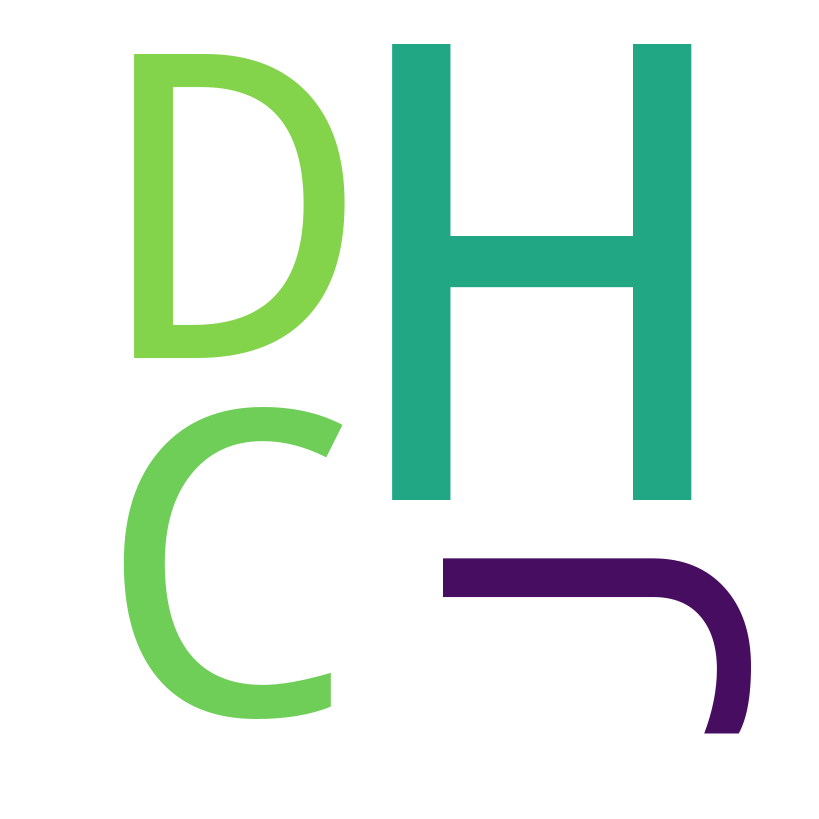

In [ ]:
max_frequency = max(dictToWordClouds.values())
scaling_factor = 3
scaled_frequencies = {word: scaling_factor * (frequency / max_frequency) for word, frequency in dictToWordClouds.items()}

text = ' '.join([word for word in scaled_frequencies for _ in range(round(scaled_frequencies[word]))])
# print(text)
nube_palabras = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(nube_palabras)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()